<a href="https://colab.research.google.com/github/Qossai/EDA-Analysis/blob/main/Another_copy_of_Exercise_1_EDA_and_Data_Cleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
!pip install sweetviz

In [ ]:
!pip install pandas_profiling

In [ ]:
!pip install autoviz

In [ ]:
import pandas as pd
import sweetviz as sv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics as stats
from scipy.stats import zscore, iqr

In [ ]:
df = pd.read_csv("/content/hrm-employee-attrition_unclean.csv")
df.head()

Unnamed: 0 Attrition   Age     BusinessTravel  DailyRate  \
0           0       Yes  41.0      Travel_Rarely     1102.0   
1           1        No  49.0  Travel_Frequently      279.0   
2           2       Yes  37.0      Travel_Rarely     1373.0   
3           3        No  33.0  Travel_Frequently     1392.0   
4           4        No  27.0      Travel_Rarely      591.0   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales               1.0          2  Life Sciences   
1  Research & Development               8.0          1  Life Sciences   
2  Research & Development               2.0          2          Other   
3  Research & Development               3.0          4  Life Sciences   
4  Research & Development               2.0          1        Medical   

   EnvironmentSatisfaction  ... TotalWorkingYears  TrainingTimesLastYear  \
0                      2.0  ...               8.0                    0.0   
1                      3.0  ...              10.0                    3.0   
2                      4.0  ...               7.0                    3.0   
3                      4.0  ...               8.0                    3.0   
4                      1.0  ...               6.0                    3.0   

   WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0              1.0             6.0                4.0   
1              3.0            10.0                7.0   
2              3.0             0.0                0.0   
3              3.0             8.0                7.0   
4              3.0             2.0                2.0   

   YearsSinceLastPromotion YearsWithCurrManager  SalaryAddition  \
0                      NaN                  5.0      792.803050   
1                      1.0                  7.0     1199.848653   
2                      0.0                  0.0     1366.620630   
3                      3.0                  0.0     1770.840125   
4                      2.0                  2.0     1043.414893   

   YearlyHollidayDays  DrivingKilometers  
0                10.0                NaN  
1                 NaN                NaN  
2                 NaN                NaN  
3                10.0           0.640162  
4                10.0           2.122465  

[5 rows x 37 columns]

In [ ]:
advert_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
#information about the variables we have in the data set
df.dtypes

Unnamed: 0                    int64
Attrition                    object
Age                         float64
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                     int64
EducationField               object
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel              int64
TotalWorkingYears           

In [ ]:
df['Attrition'] = df['Attrition'].astype('category')
df['BusinessTravel'] = df['BusinessTravel'].astype('category')
df['Department '] = df['Department'].astype('category')
df['EducationField'] = df['EducationField'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['JobRole'] = df['JobRole'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')
df['Over18'] = df['Over18'].astype('category')
df['OverTime'] = df['OverTime'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Unnamed: 0                1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   Age                       1470 non-null   float64 
 3   BusinessTravel            1470 non-null   category
 4   DailyRate                 1470 non-null   float64 
 5   Department                1470 non-null   object  
 6   DistanceFromHome          1470 non-null   float64 
 7   Education                 1470 non-null   int64   
 8   EducationField            1470 non-null   category
 9   EnvironmentSatisfaction   1470 non-null   float64 
 10  Gender                    1470 non-null   category
 11  HourlyRate                1470 non-null   float64 
 12  JobInvolvement            1470 non-null   float64 
 13  JobLevel                  1470 non-null   float6

In [ ]:
df.describe()

Unnamed: 0          Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000  1470.000000       1470.000000  1470.000000   
mean    734.500000    36.923810   802.485714          9.192517     2.912925   
std     424.496761     9.135373   403.509100          8.106864     1.024165   
min       0.000000    18.000000   102.000000          1.000000     1.000000   
25%     367.250000    30.000000   465.000000          2.000000     2.000000   
50%     734.500000    36.000000   802.000000          7.000000     3.000000   
75%    1101.750000    43.000000  1157.000000         14.000000     4.000000   
max    1469.000000    60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  ...  TotalWorkingYears  TrainingTimesLastYear  \
count      1470.000000  ...        1470.000000            1178.000000   
mean          2.728571  ...          11.279592               2.798812   
std           1.102846  ...           7.780782               1.277649   
min           1.000000  ...           0.000000               0.000000   
25%           2.000000  ...           6.000000               2.000000   
50%           3.000000  ...          10.000000               3.000000   
75%           4.000000  ...          15.000000               3.000000   
max           4.000000  ...          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  SalaryAddition  \
count              1382.000000           1470.000000     1297.000000   
mean                  2.203329              4.123129     1051.268356   
std                   3.245881              3.568136      355.666641   
min                   0.000000              0.000000     -107.560585   
25%                   0.000000              2.000000      829.150161   
50%                   1.000000              3.000000     1054.631164   
75%                   3.000000              7.000000     1294.532565   
max                  15.000000             17.000000     2244.231246   

       YearlyHollidayDays  DrivingKilometers  
count          942.000000         353.000000  
mean            16.809979           1.381489  
std              8.248208           1.112183  
min             10.000000           0.608337  
25%             10.000000           0.802540  
50%             15.000000           1.065428  
75%             22.000000           1.552673  
max             60.000000          10.214027  

[8 rows x 28 columns]

In [ ]:
df.describe().transpose()

count          mean          std          min  \
Unnamed: 0                1470.0    734.500000   424.496761     0.000000   
Age                       1470.0     36.923810     9.135373    18.000000   
DailyRate                 1470.0    802.485714   403.509100   102.000000   
DistanceFromHome          1470.0      9.192517     8.106864     1.000000   
Education                 1470.0      2.912925     1.024165     1.000000   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.000000   
HourlyRate                1470.0     65.891156    20.329428    30.000000   
JobInvolvement            1470.0      2.729932     0.711561     1.000000   
JobLevel                  1470.0      2.063946     1.106940     1.000000   
JobSatisfaction           1470.0      2.728571     1.102846     1.000000   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.000000   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.000000   
NumCompaniesWorked        1425.0      2.683509     2.486517     0.000000   
PercentSalaryHike         1470.0     15.209524     3.659938    11.000000   
PerformanceRating         1470.0      3.153741     0.360824     3.000000   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.000000   
StandardHours             1470.0     80.000000     0.000000    80.000000   
StockOptionLevel          1470.0      0.793878     0.852077     0.000000   
TotalWorkingYears         1470.0     11.279592     7.780782     0.000000   
TrainingTimesLastYear     1178.0      2.798812     1.277649     0.000000   
WorkLifeBalance           1470.0      2.761224     0.706476     1.000000   
YearsAtCompany            1470.0      7.008163     6.126525     0.000000   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.000000   
YearsSinceLastPromotion   1382.0      2.203329     3.245881     0.000000   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.000000   
SalaryAddition            1297.0   1051.268356   355.666641  -107.560585   
YearlyHollidayDays         942.0     16.809979     8.248208    10.000000   
DrivingKilometers          353.0      1.381489     1.112183     0.608337   

                                  25%           50%           75%  \
Unnamed: 0                 367.250000    734.500000   1101.750000   
Age                         30.000000     36.000000     43.000000   
DailyRate                  465.000000    802.000000   1157.000000   
DistanceFromHome             2.000000      7.000000     14.000000   
Education                    2.000000      3.000000      4.000000   
EnvironmentSatisfaction      2.000000      3.000000      4.000000   
HourlyRate                  48.000000     66.000000     83.750000   
JobInvolvement               2.000000      3.000000      3.000000   
JobLevel                     1.000000      2.000000      3.000000   
JobSatisfaction              2.000000      3.000000      4.000000   
MonthlyIncome             2911.000000   4919.000000   8379.000000   
MonthlyRate               8047.000000  14235.500000  20461.500000   
NumCompaniesWorked           1.000000      2.000000      4.000000   
PercentSalaryHike           12.000000     14.000000     18.000000   
PerformanceRating            3.000000      3.000000      3.000000   
RelationshipSatisfaction     2.000000      3.000000      4.000000   
StandardHours               80.000000     80.000000     80.000000   
StockOptionLevel             0.000000      1.000000      1.000000   
TotalWorkingYears            6.000000     10.000000     15.000000   
TrainingTimesLastYear        2.000000      3.000000      3.000000   
WorkLifeBalance              2.000000      3.000000      3.000000   
YearsAtCompany               3.000000      5.000000      9.000000   
YearsInCurrentRole           2.000000      3.000000      7.000000   
YearsSinceLastPromotion      0.000000      1.000000      3.000000   
YearsWithCurrManager         2.000000      3.000000      7.000000   
SalaryAddition             8

In [ ]:
df.isna().sum()


Unnamed: 0                     0
Attrition                      0
Age                            0
BusinessTravel                 0
DailyRate                      0
Department                     0
DistanceFromHome               0
Education                      0
EducationField                 0
EnvironmentSatisfaction        0
Gender                         0
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                  0
MonthlyIncome                  0
MonthlyRate                    0
NumCompaniesWorked            45
Over18                         0
OverTime                       0
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
StandardHours                  0
StockOptionLevel               0
TotalWorkingYears              0
TrainingTimesLastYear        292
WorkLifeBalance                0
YearsAtCom

<Axes: title={'center': 'Business Travel'}, ylabel='BusinessTravel'>

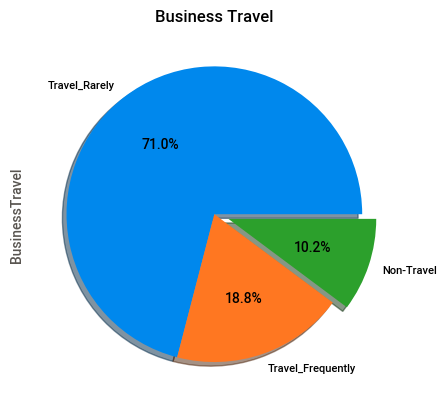

In [ ]:
#Show plot pie grapgh to check some of the variables (columns):
#Business Travel, based on the data set you can see in the grapgh people who travel rarely are 71%

df['BusinessTravel'].value_counts().plot(kind="pie", title="Business Travel", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)

<Axes: title={'center': 'Education Field'}, ylabel='EducationField'>

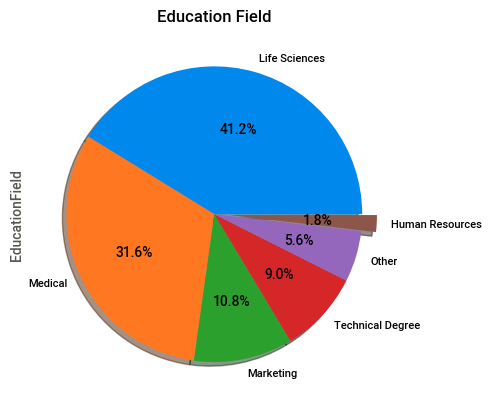

In [ ]:
#Show plot pie grapgh to check some of the variables (columns):
#Education Field, based on the data set you can see in the grapgh people who studied Life sciences are the highest - 41.2%

df['EducationField'].value_counts().plot(kind="pie", title="Education Field", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0, 0, 0, 0.1), \
                   shadow=True, startangle=0)

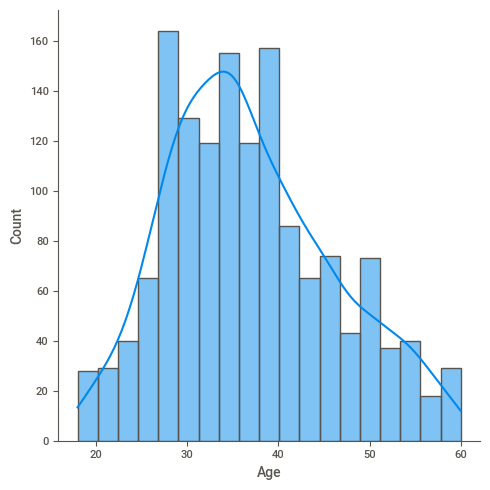

In [ ]:
# show the age in the data set, most of the people are in the range between 20 to 40

sns.displot(df['Age'] , kde=True)


In [ ]:
from pandas.api.types import is_numeric_dtype

IndexError: index 9 is out of bounds for axis 0 with size 9

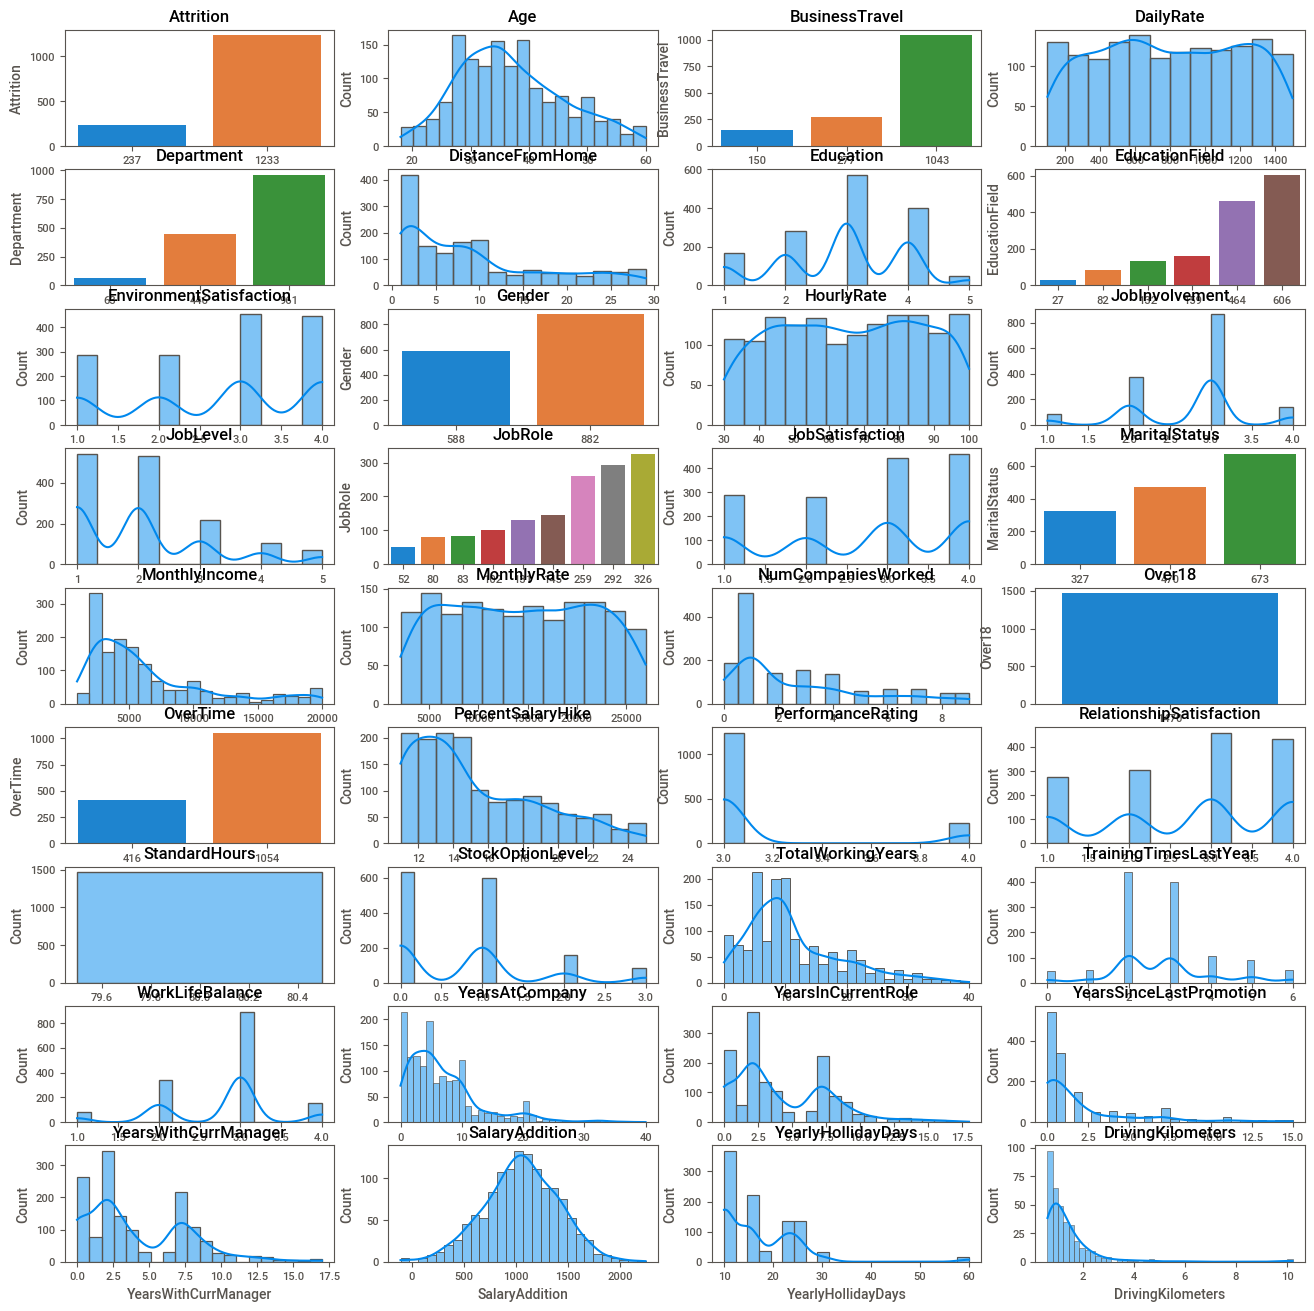

In [ ]:
vn = df.columns

fig, ax = plt.subplots(9,4,figsize=(16,16))
m = 0
n = 0
for i in range(1,df.shape[1]):
    if m >= 4:
        m = 0
        n = n + 1
    if is_numeric_dtype(df[vn[i]]):
        sns.histplot(ax=ax[n,m], x=df[vn[i]], kde=True).set(title=vn[i])
    else:
        sns.barplot(ax=ax[n,m], x=df[vn[i]].value_counts(), y=df[vn[i]].value_counts()).set(title=vn[i])
    m = m + 1


In [ ]:
df['StandardHours'].head()


0    80.0
1    80.0
2    80.0
3    80.0
4    80.0
Name: StandardHours, dtype: float64

In [ ]:
int_columns = df.select_dtypes('int64').columns
float_columns = df.select_dtypes('float64').columns
categorial_columns = df.select_dtypes('category').columns

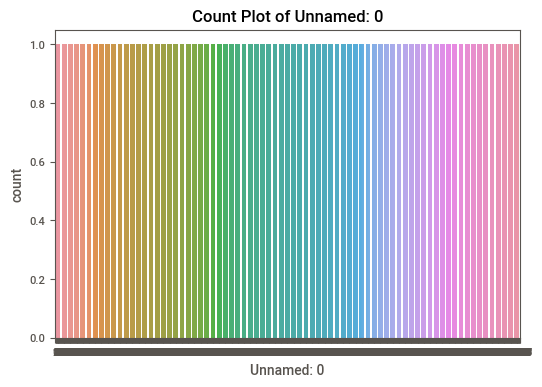

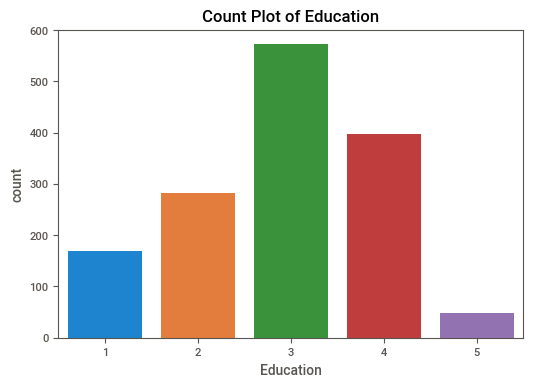

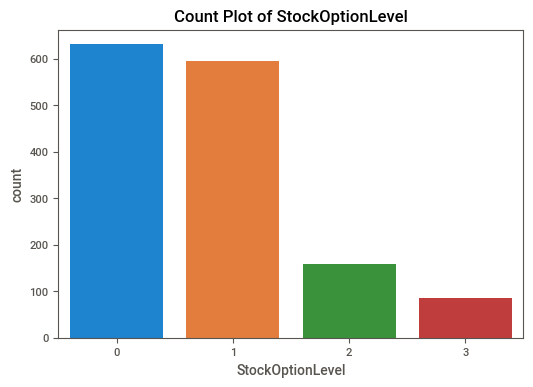

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


for int_columns in int_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=int_columns, data=df)
    plt.title(f'Count Plot of {int_columns}')
    plt.show()

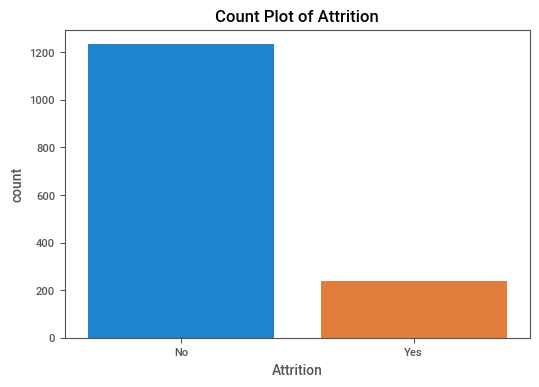

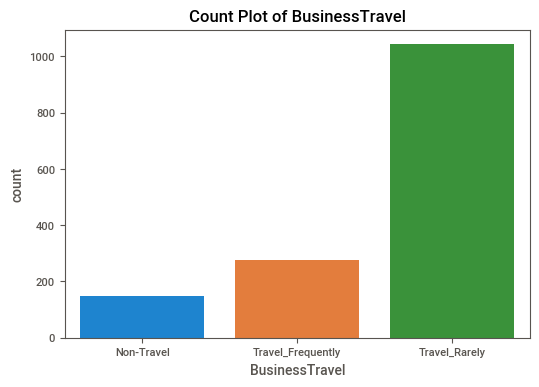

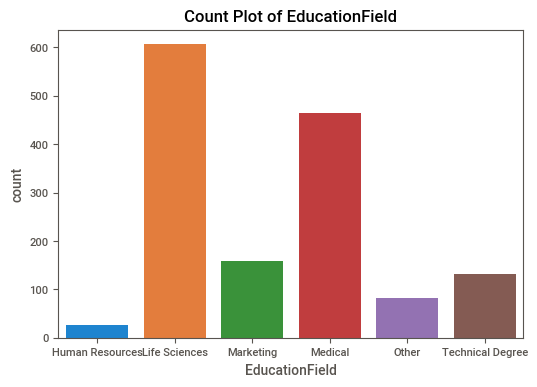

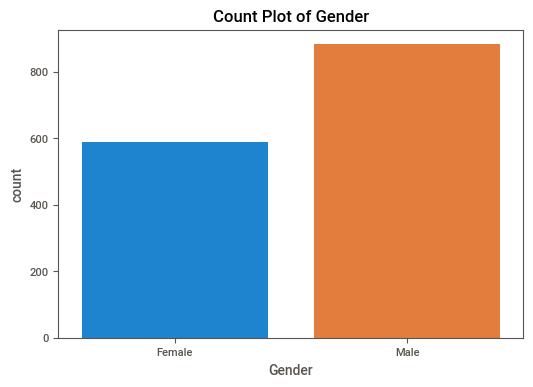

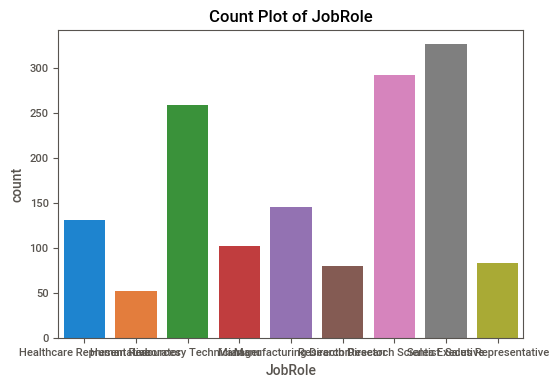

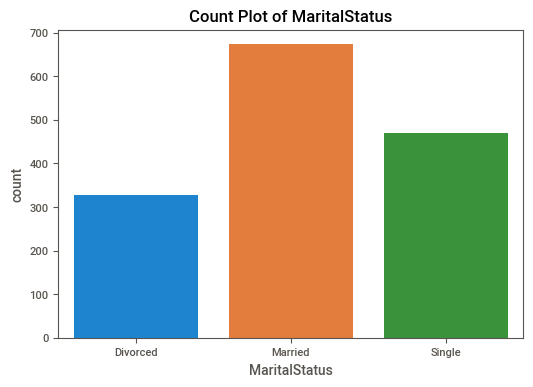

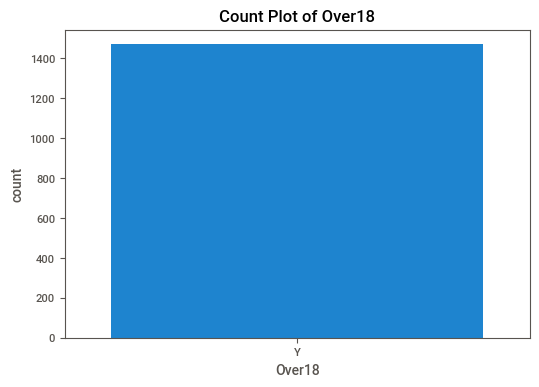

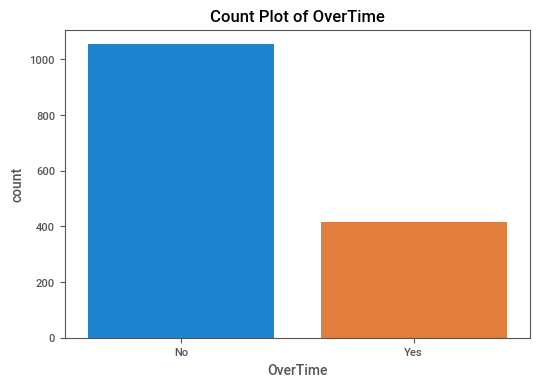

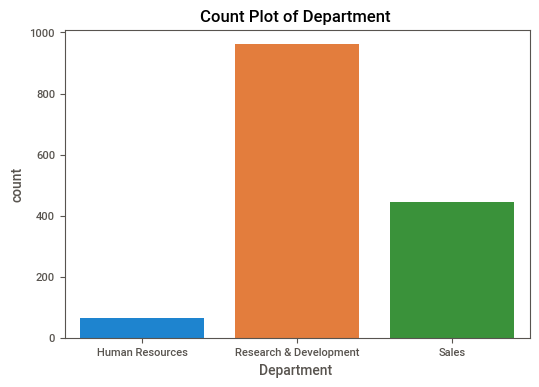

In [ ]:
for categorial_columns in categorial_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=categorial_columns, data=df)
    plt.title(f'Count Plot of {categorial_columns}')
    plt.show()


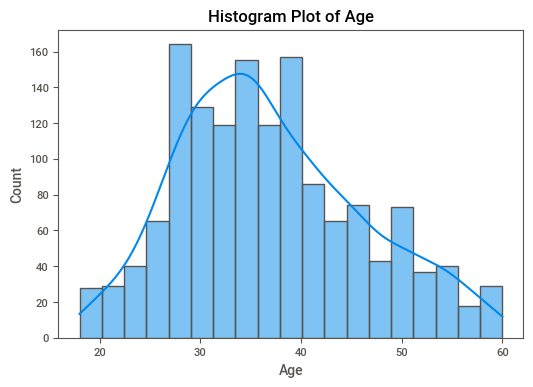

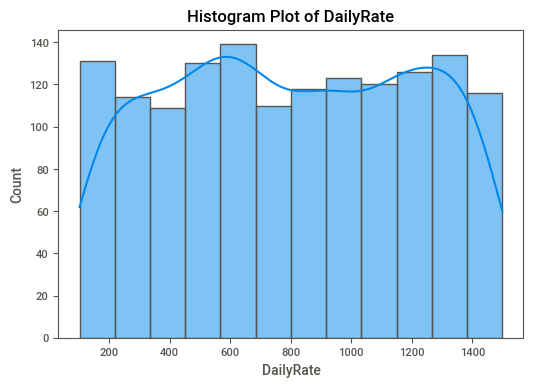

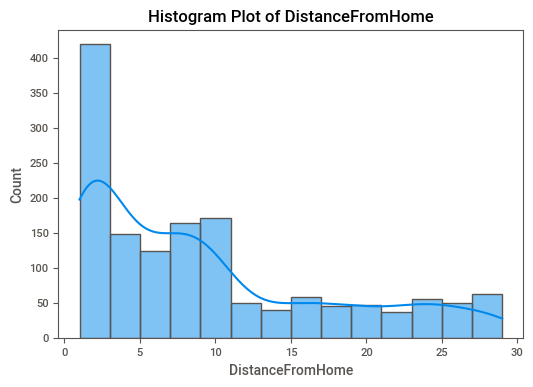

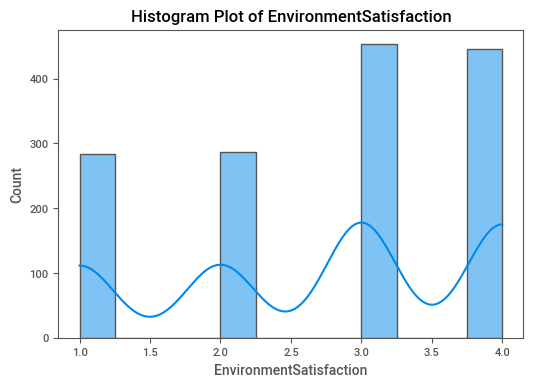

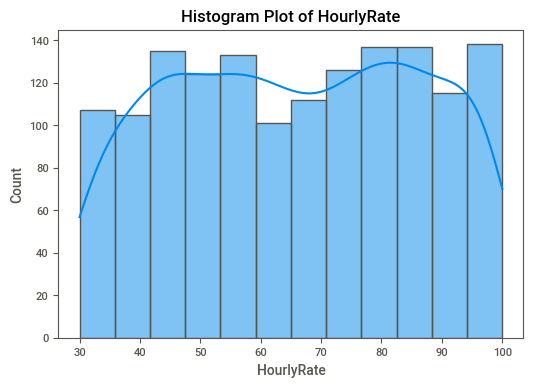

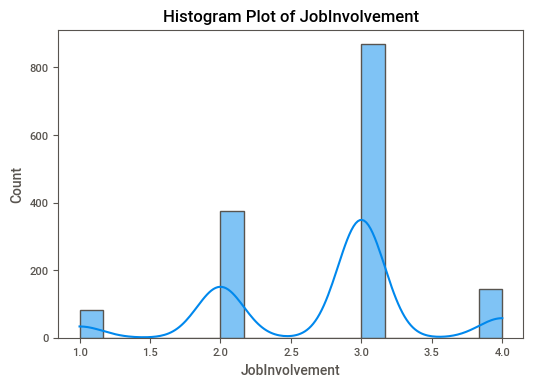

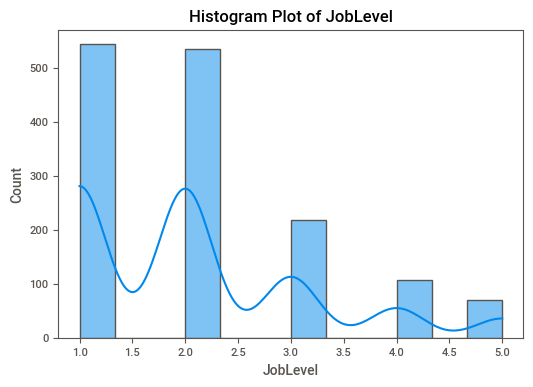

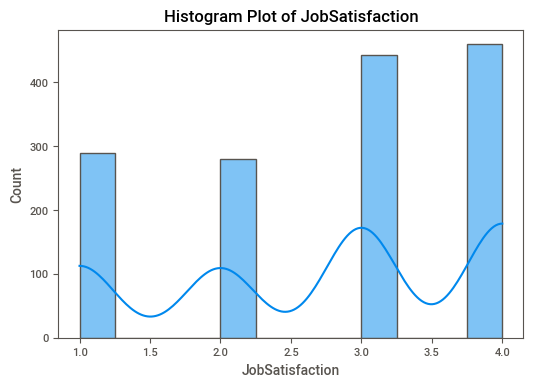

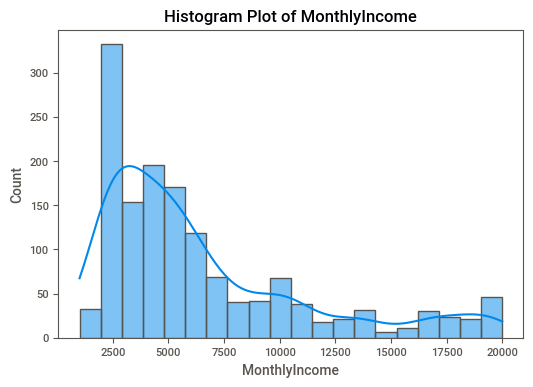

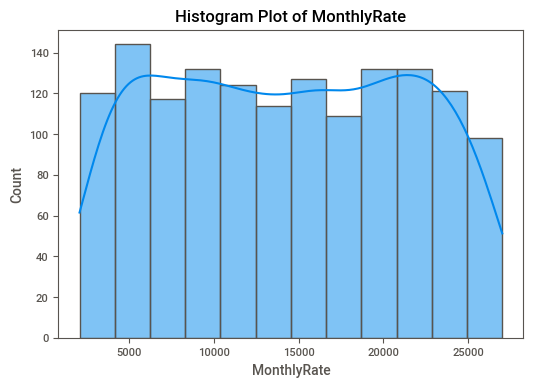

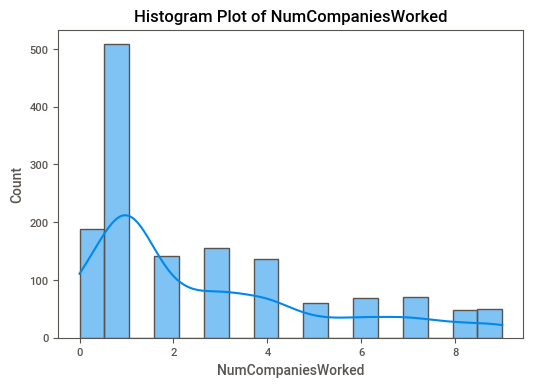

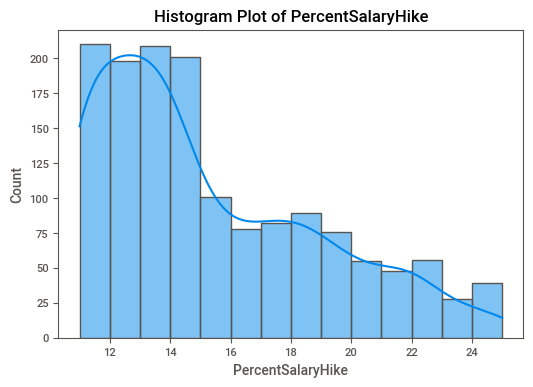

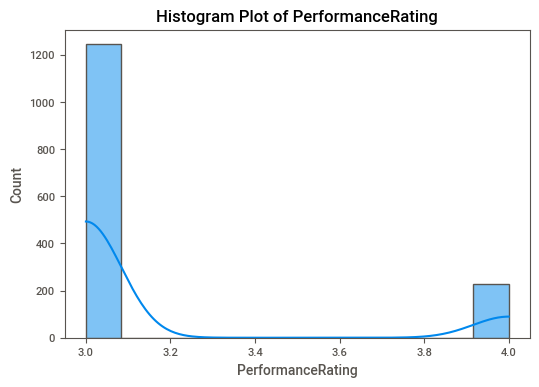

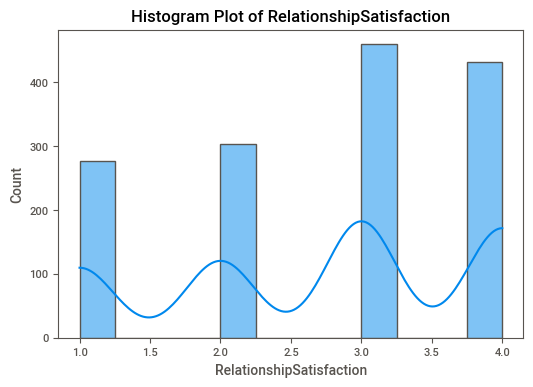

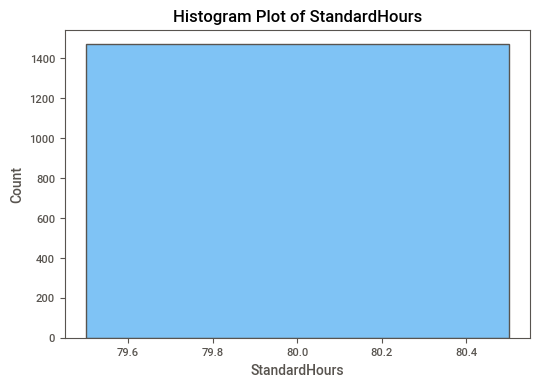

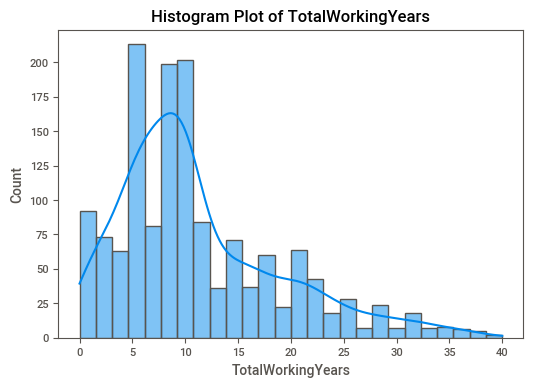

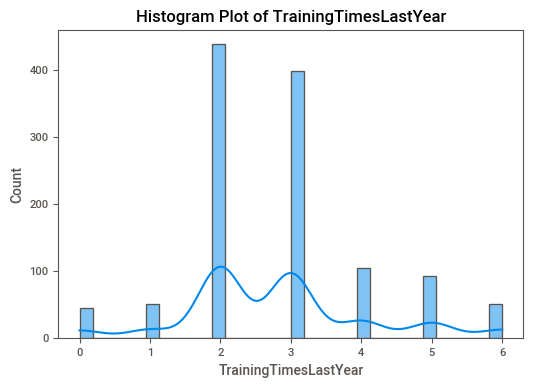

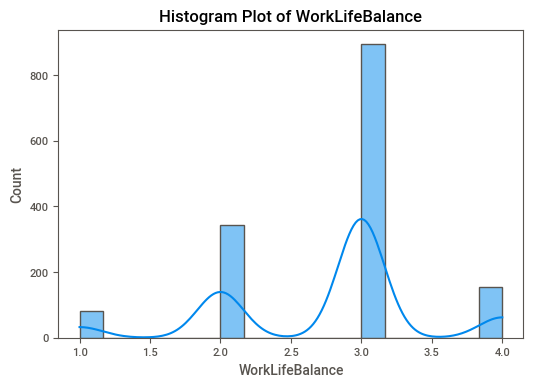

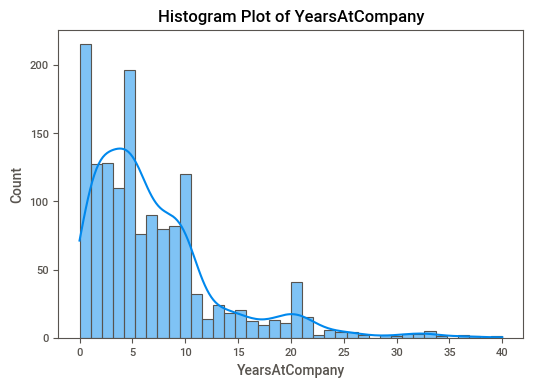

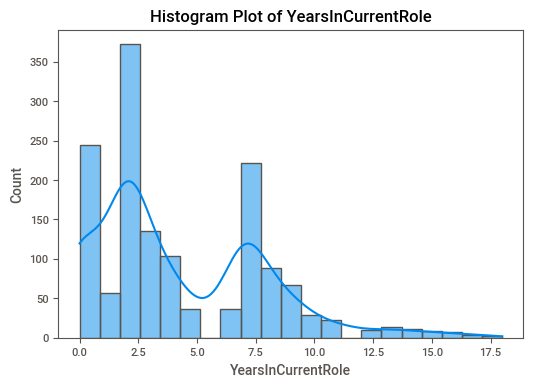

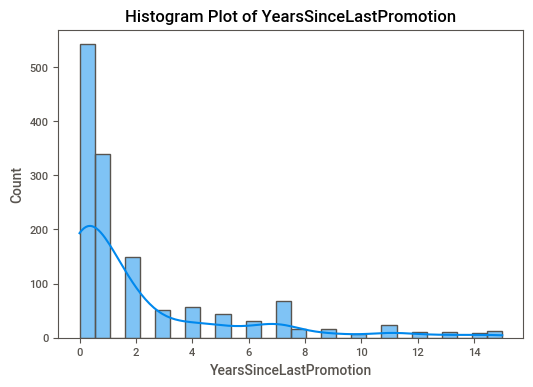

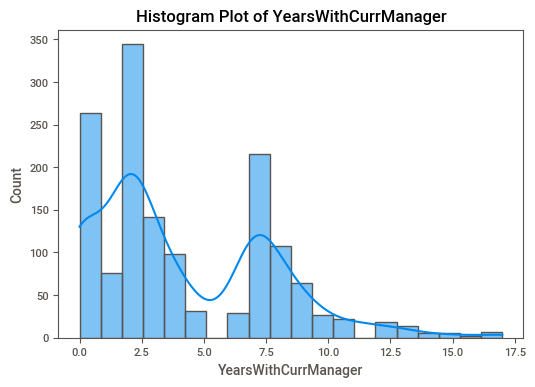

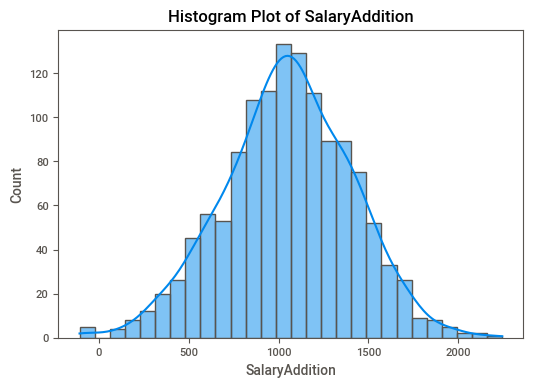

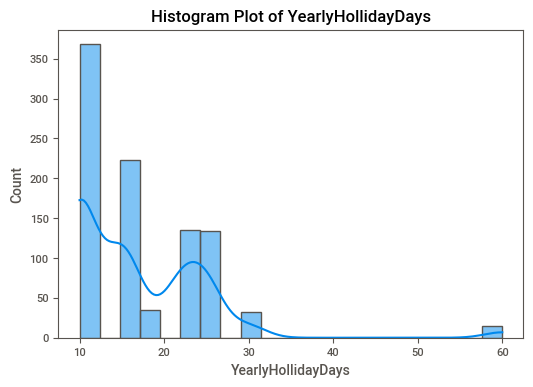

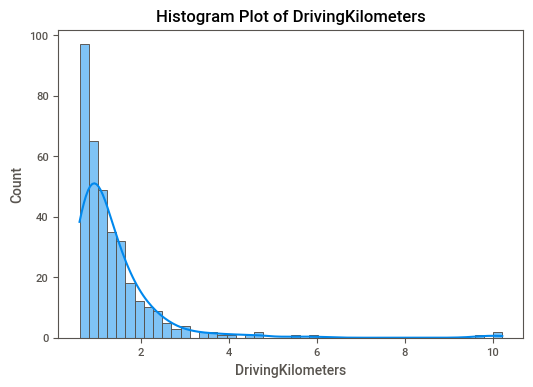

In [ ]:
float_columns = df.select_dtypes('float64').columns
float_columns
for float_column in float_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(x=float_column, data=df, kde=True)
    plt.title(f'Histogram Plot of {float_column}')
    plt.show()

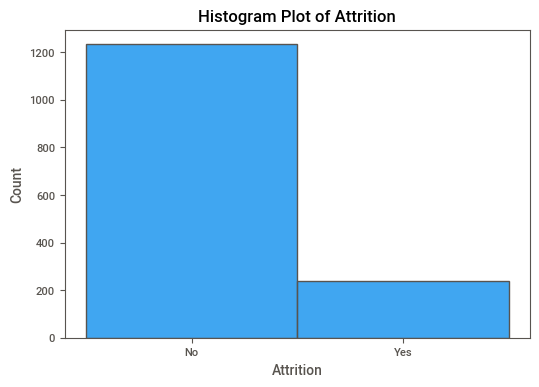

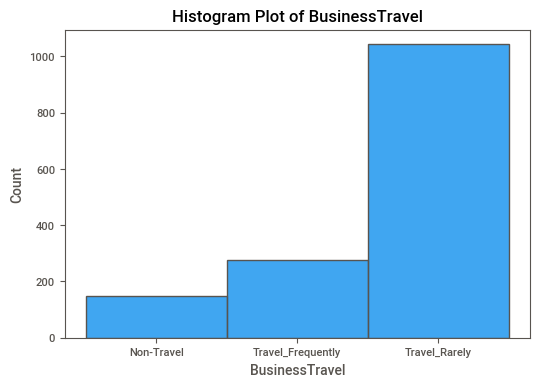

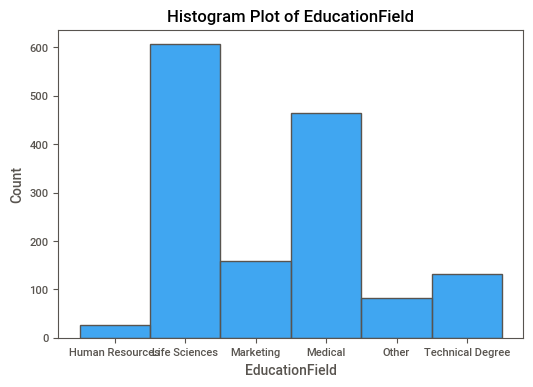

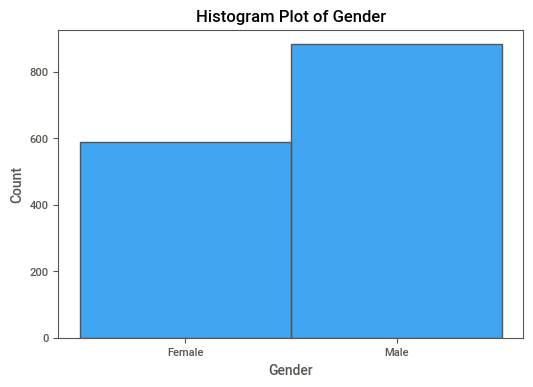

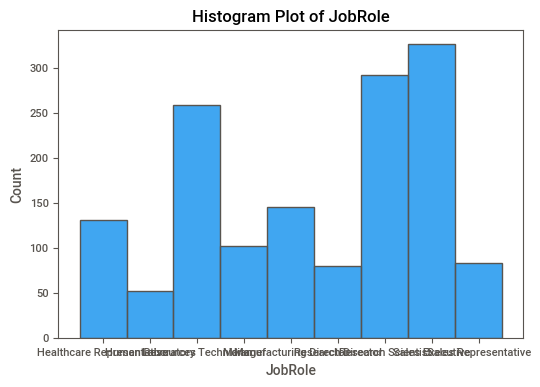

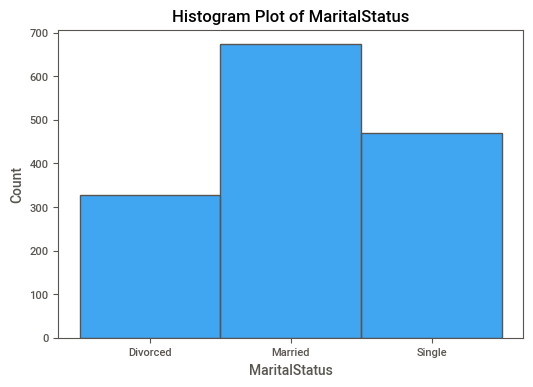

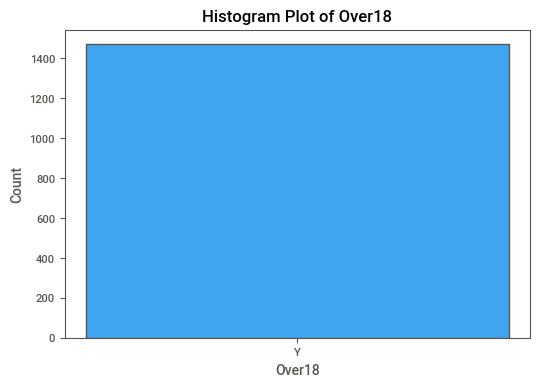

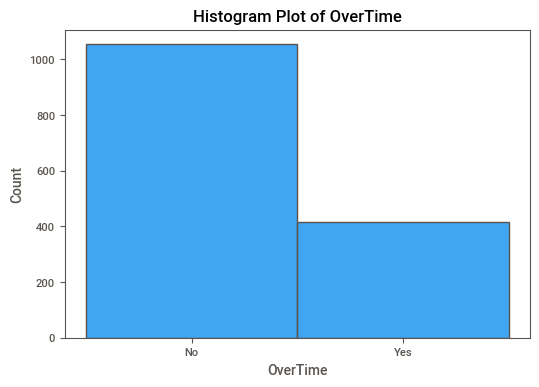

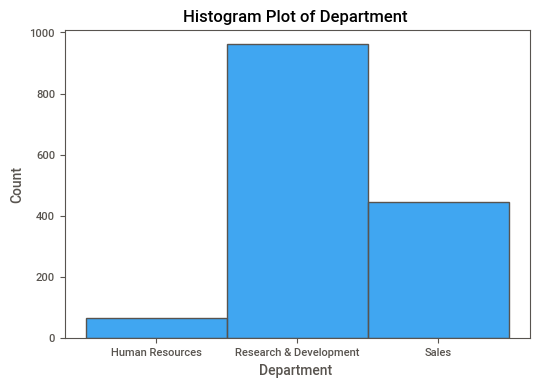

In [ ]:
categorial_columns = df.select_dtypes('category').columns

for categorial_column in categorial_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(x=categorial_column, data=df)
    plt.title(f'Histogram Plot of {categorial_column}')
    plt.show()

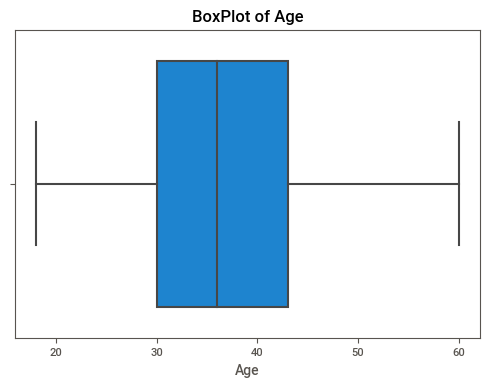

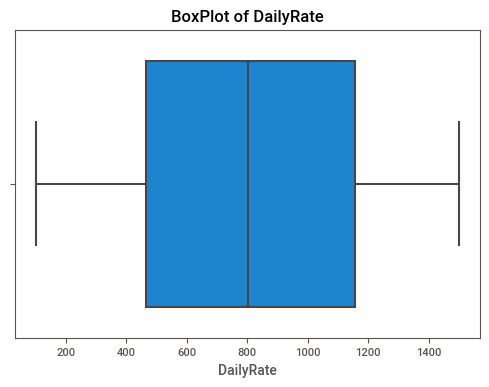

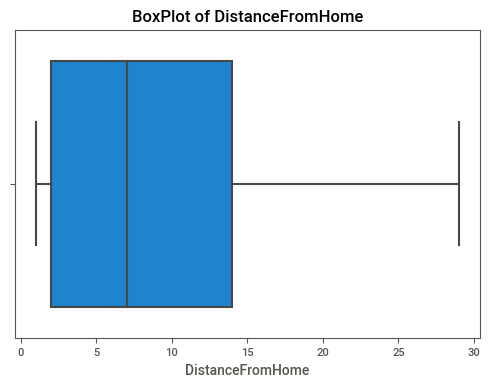

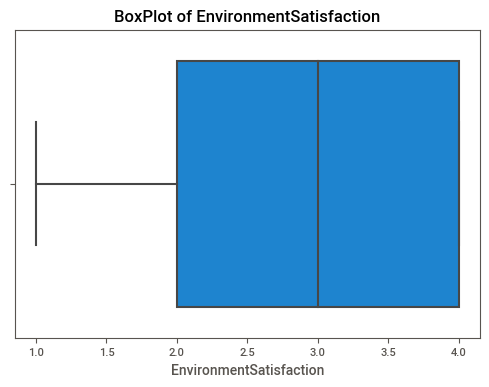

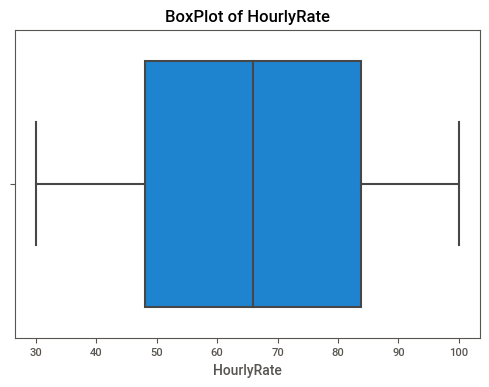

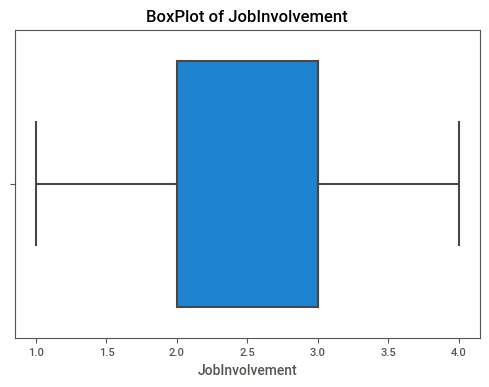

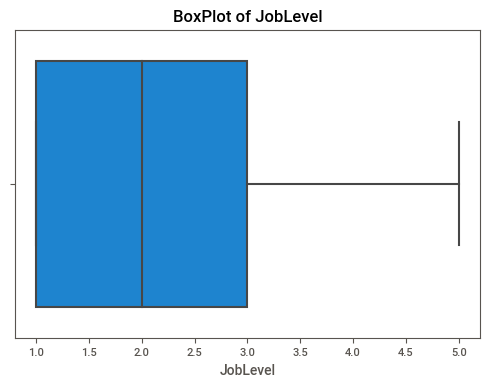

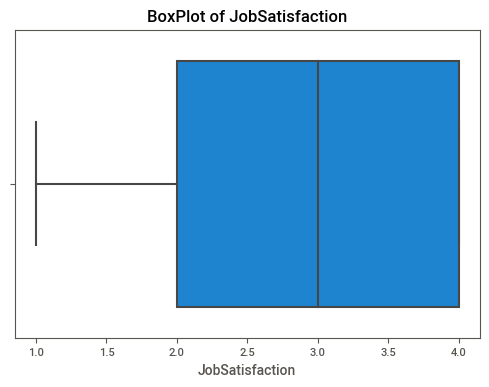

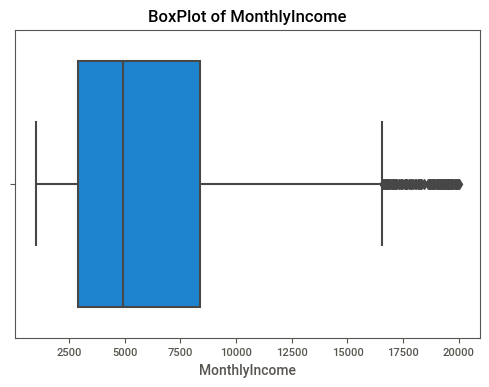

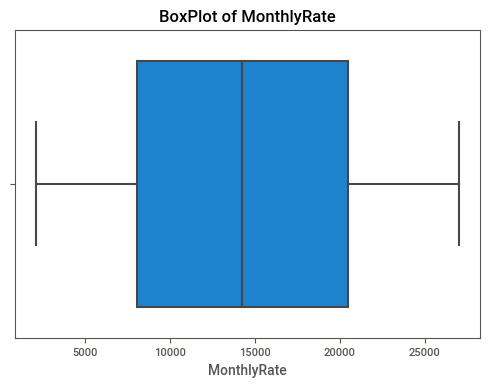

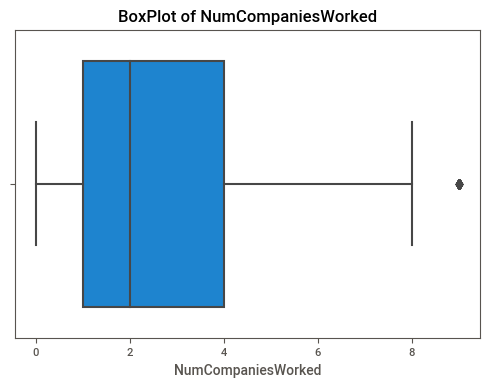

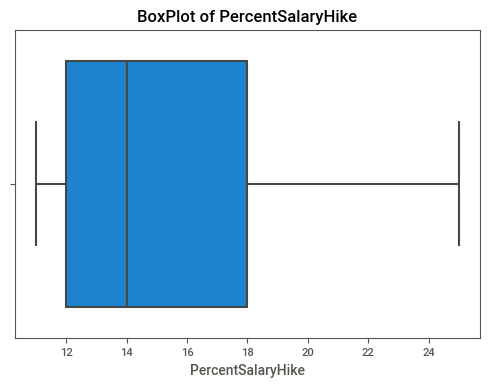

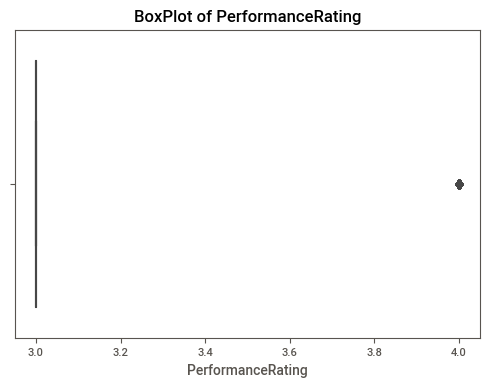

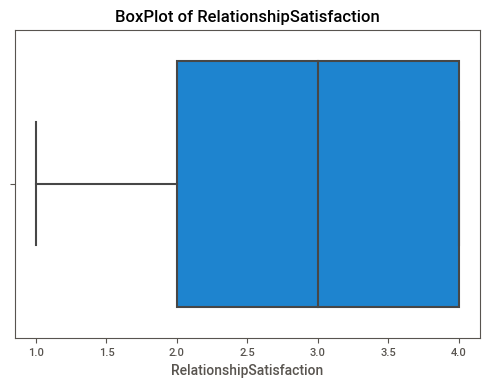

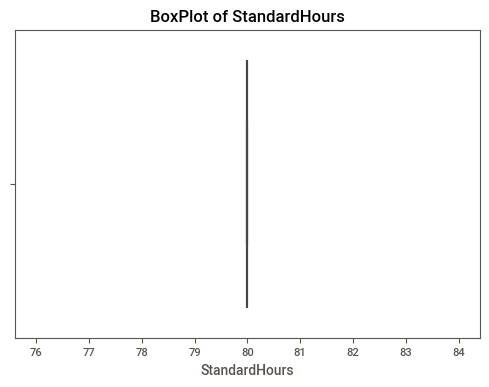

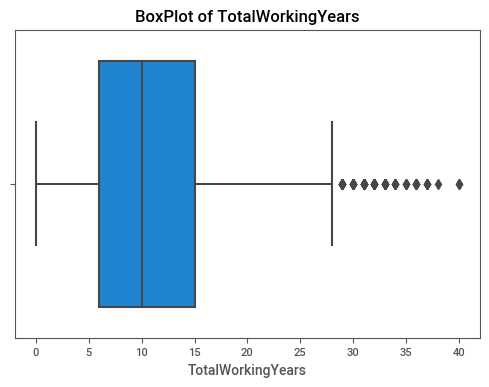

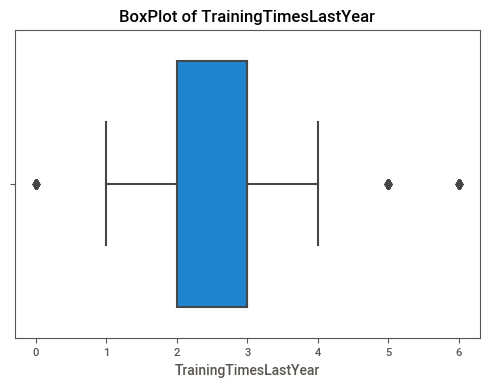

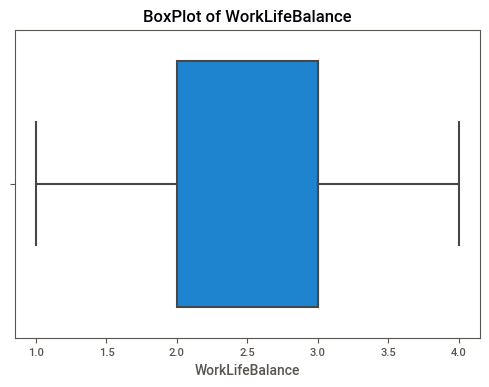

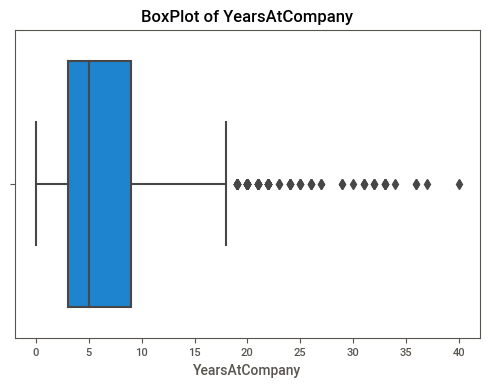

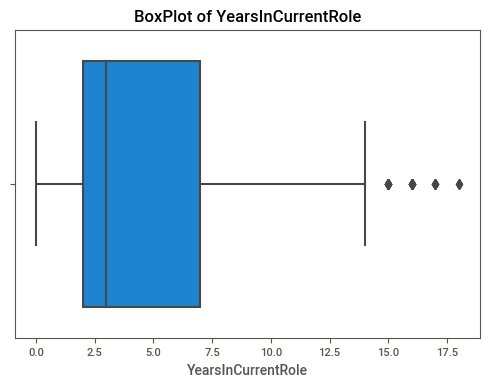

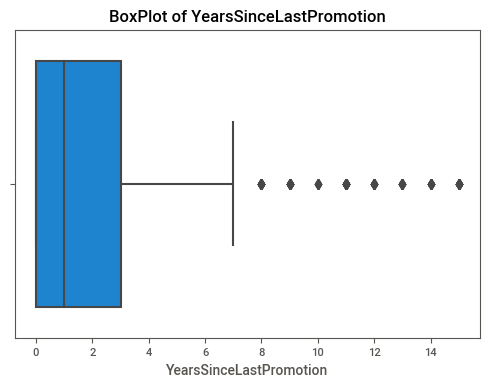

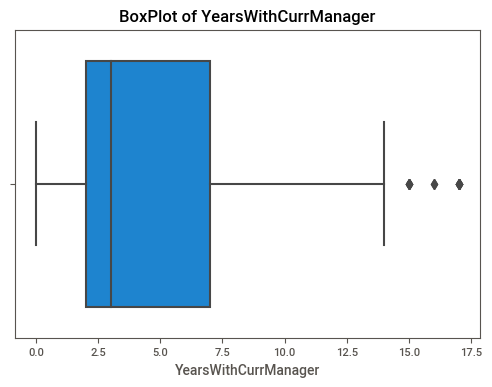

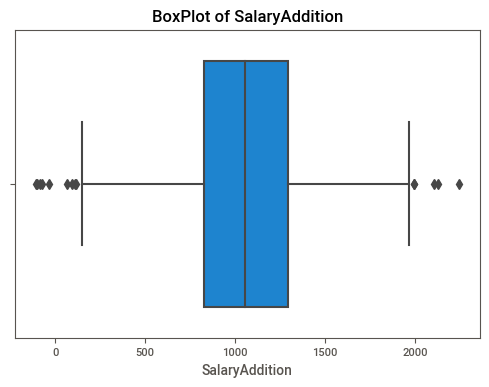

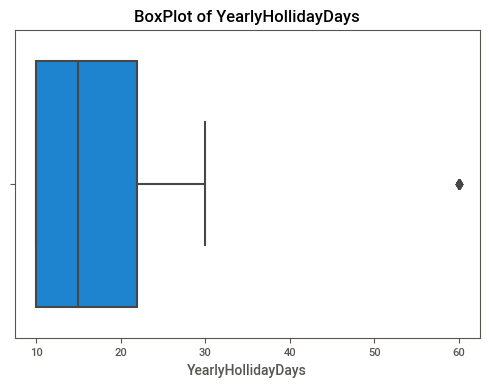

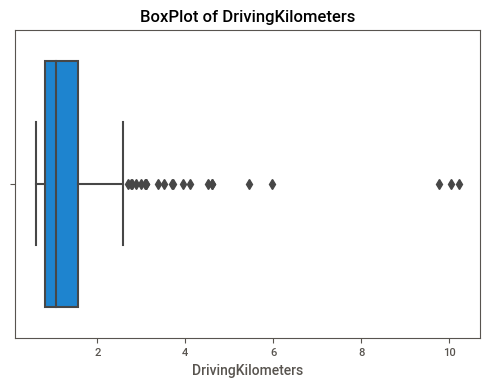

In [ ]:
float_columns = df.select_dtypes('float64').columns
float_columns
for float_column in float_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=float_column, data=df)
    plt.title(f'BoxPlot of {float_column}')
    plt.show()

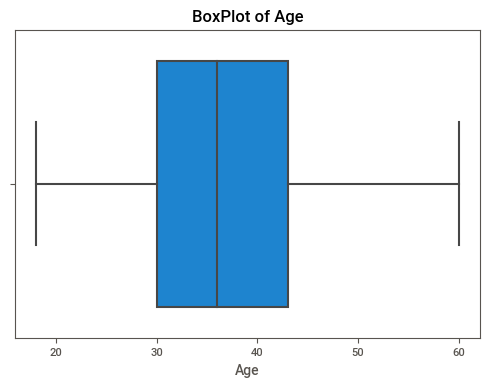

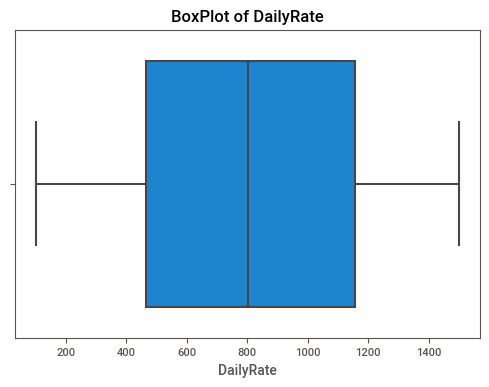

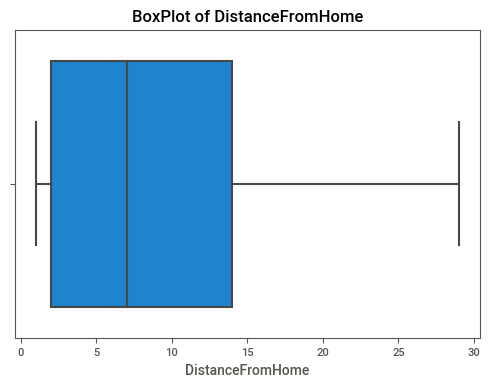

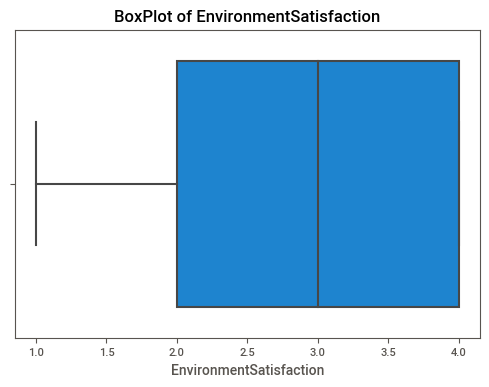

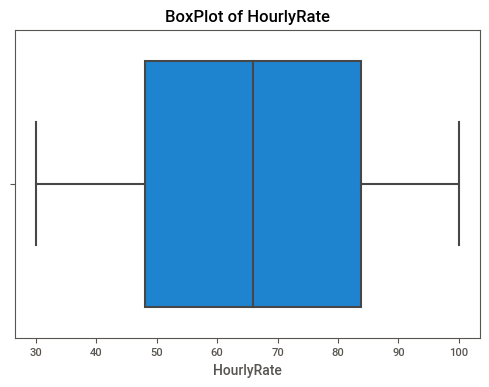

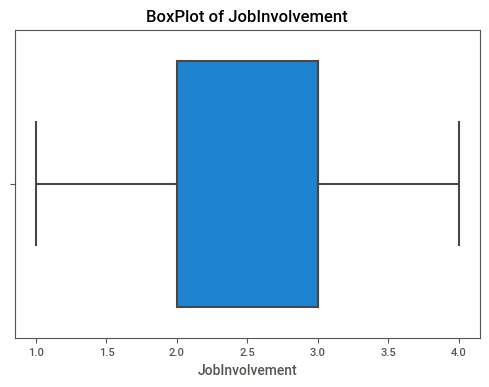

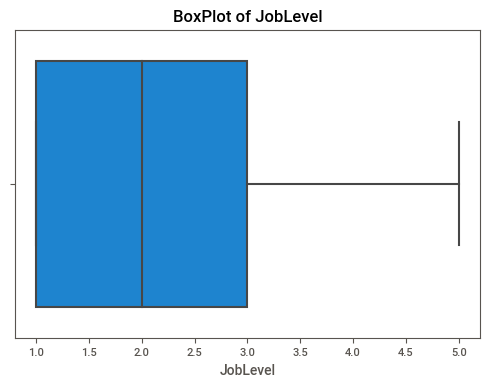

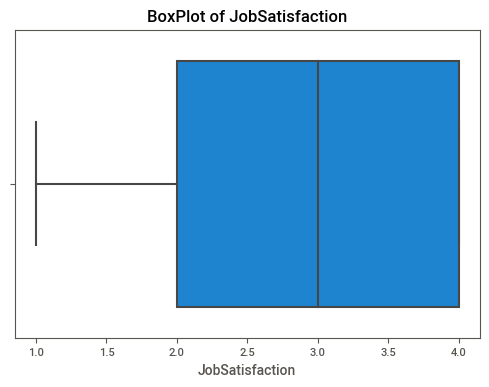

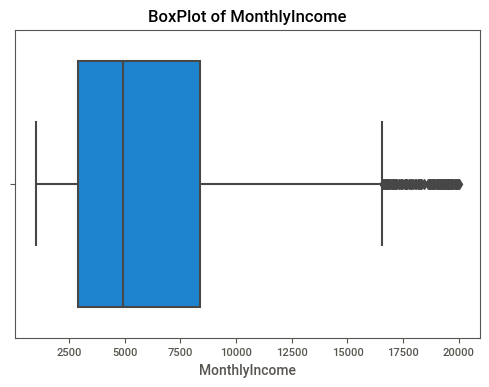

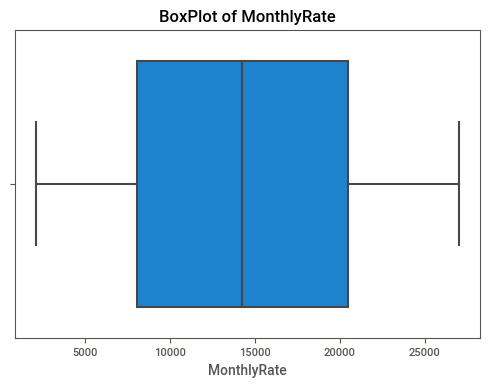

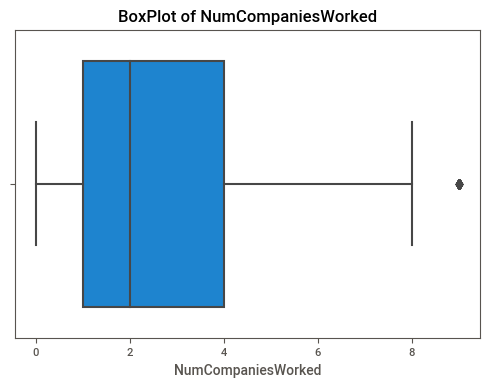

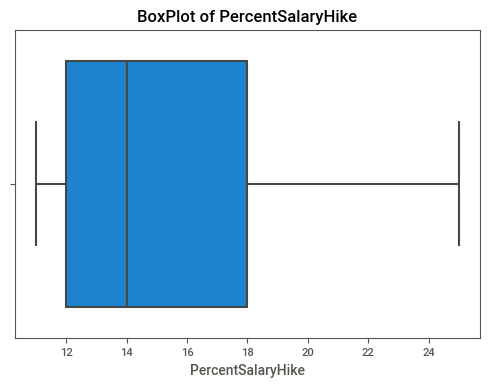

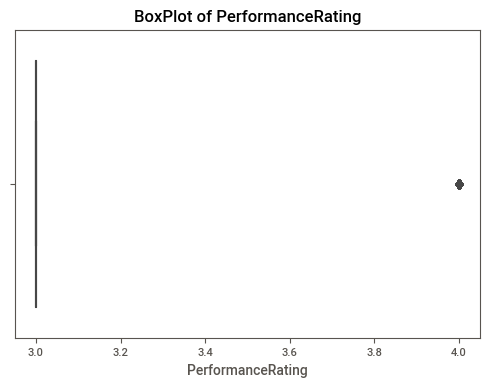

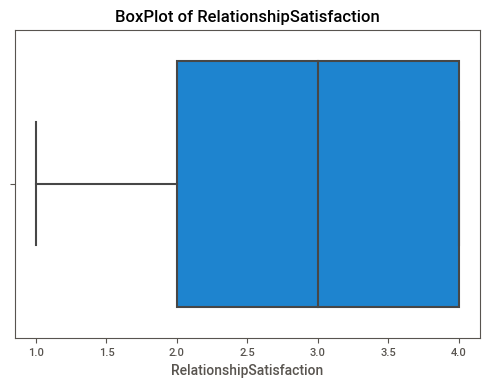

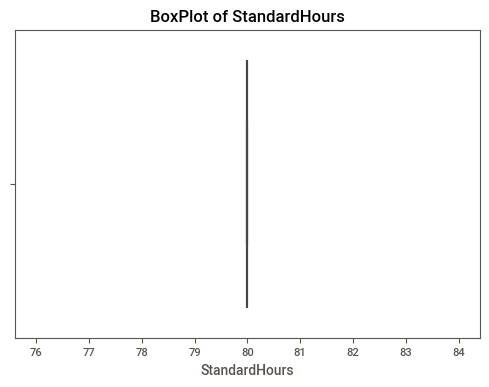

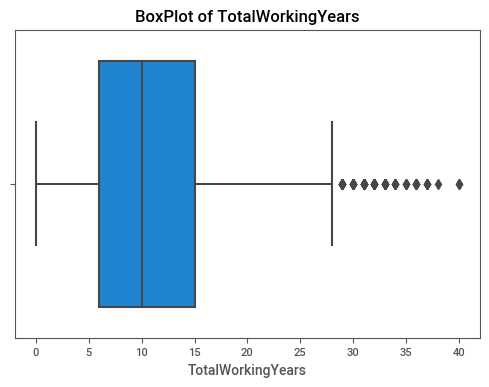

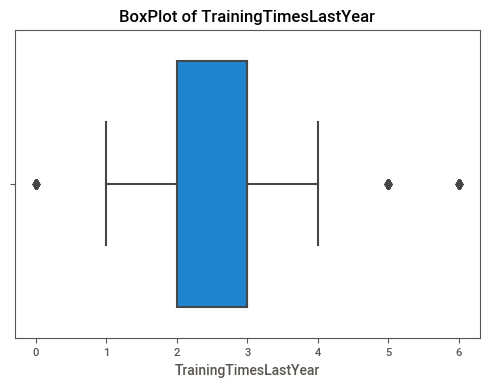

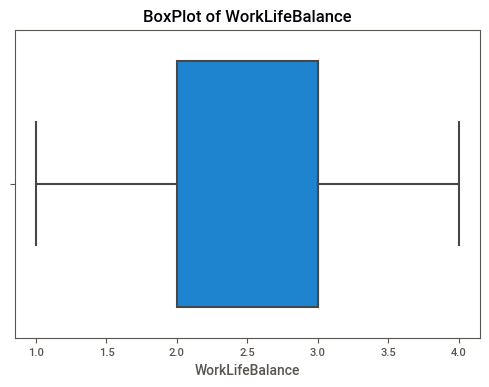

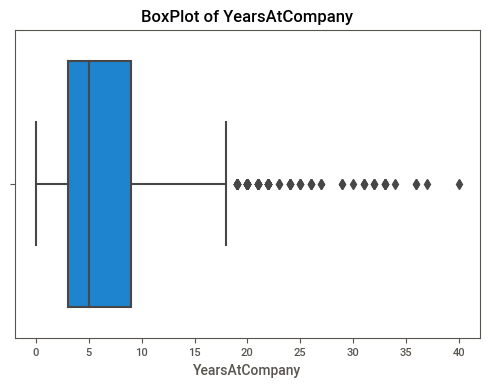

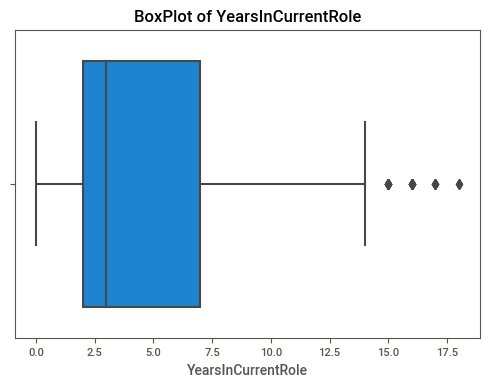

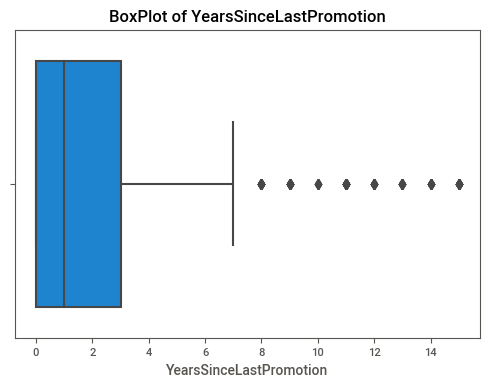

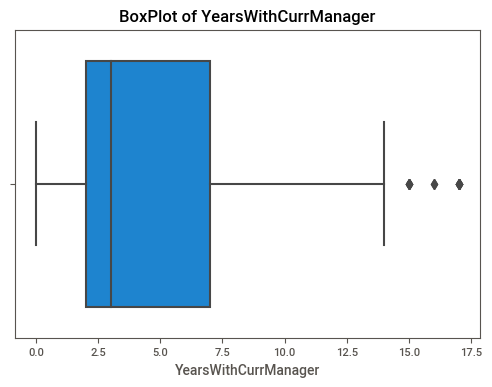

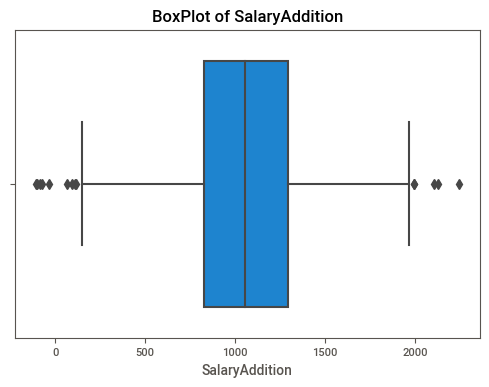

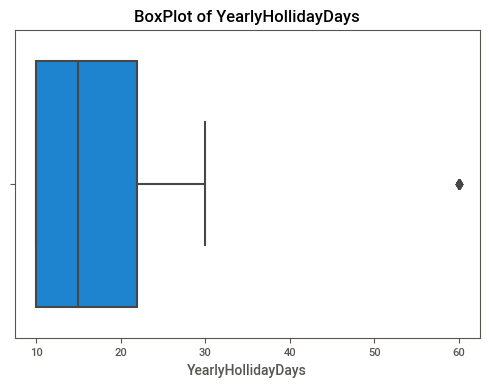

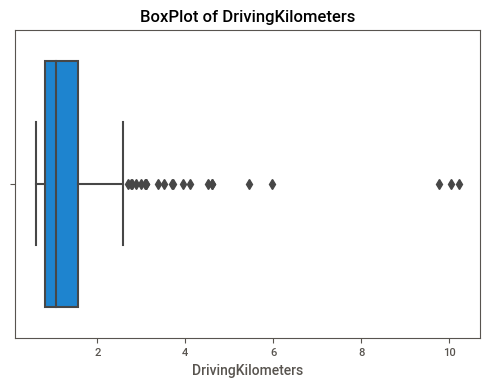

In [ ]:
int_columns = df.select_dtypes('float64').columns
int_columns
for int_column in int_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=int_column, data=df)
    plt.title(f'BoxPlot of {int_column}')
    plt.show()

In [ ]:
#we will check all the categorial variables and change them to int variables:

print(np.unique(df['Attrition']))
print(np.unique(df['BusinessTravel']))
print(np.unique(df['Department']))
print(np.unique(df['EducationField']))
print(np.unique(df['Gender']))
print(np.unique(df['JobRole']))
print(np.unique(df['MaritalStatus']))
print(np.unique(df['Over18']))
print(np.unique(df['OverTime']))

['No' 'Yes']
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['Y']
['No' 'Yes']


In [ ]:
df_int_category = df[['Unnamed: 0', 'Attrition', 'BusinessTravel', 'Department', 'Education',
'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18',
'OverTime', 'StockOptionLevel']].copy()
df['Attrition'].replace({'No': 0, 'Yes': 1}, inplace = True)
df['BusinessTravel'].replace({'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2}, inplace = True)
df['Department'].replace({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}, inplace = True)
df['EducationField'].replace({'Life Sciences': 0, 'Human Resources': 1,
                              'Other': 2, 'Technical Degree': 3, 'Marketing': 4,
                             'Medical': 5}, inplace = True)
df['Gender'].replace({'Female': 0, 'Male': 1}, inplace = True)
df['JobRole'].replace({'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2,
 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5,
 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}, inplace = True)
df['MaritalStatus'].replace({'Divorced': 0, 'Married': 1, 'Single': 2}, inplace = True)
df['Over18'].replace({'Y': 0}, inplace = True)
df['OverTime'].replace({'No': 0, 'Yes': 1}, inplace = True)




In [ ]:
df.head()

Unnamed: 0 Attrition   Age BusinessTravel  DailyRate  Department  \
0           0         1  41.0              0     1102.0           0   
1           1         0  49.0              1      279.0           1   
2           2         1  37.0              0     1373.0           1   
3           3         0  33.0              1     1392.0           1   
4           4         0  27.0              0      591.0           1   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  ...  \
0               1.0          2              0                      2.0  ...   
1               8.0          1              0                      3.0  ...   
2               2.0          2              2                      4.0  ...   
3               3.0          4              0                      4.0  ...   
4               2.0          1              5                      1.0  ...   

  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                   0.0              1.0             6.0                 4.0   
1                   3.0              3.0            10.0                 7.0   
2                   3.0              3.0             0.0                 0.0   
3                   3.0              3.0             8.0                 7.0   
4                   3.0              3.0             2.0                 2.0   

  YearsSinceLastPromotion  YearsWithCurrManager SalaryAddition  \
0                     NaN                   5.0     792.803050   
1                     1.0                   7.0    1199.848653   
2                     0.0                   0.0    1366.620630   
3                     3.0                   0.0    1770.840125   
4                     2.0                   2.0    1043.414893   

   YearlyHollidayDays  DrivingKilometers             Department   
0                10.0                NaN                   Sales  
1                 NaN                NaN  Research & Development  
2                 NaN                NaN  Research & Development  
3                10.0           0.640162  Research & Development  
4                10.0           2.122465  Research & Development  

[5 rows x 38 columns]

In [ ]:

df2 = df.dropna()
df2


Unnamed: 0 Attrition   Age BusinessTravel  DailyRate  Department  \
3              3         0  33.0              1     1392.0           1   
4              4         0  27.0              0      591.0           1   
23            23         0  21.0              0      391.0           1   
33            33         1  39.0              0      895.0           0   
37            37         0  35.0              0      890.0           0   
...          ...       ...   ...            ...        ...         ...   
1414        1414         0  47.0              0     1180.0           1   
1416        1416         0  38.0              0     1321.0           0   
1417        1417         0  31.0              0     1154.0           0   
1442        1442         1  29.0              0     1092.0           1   
1454        1454         0  45.0              0      374.0           0   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
3                  3.0          4              0                      4.0   
4                  2.0          1              5                      1.0   
23                15.0          2              0                      3.0   
33                 5.0          3              3                      4.0   
37                 2.0          3              4                      4.0   
...                ...        ...            ...                      ...   
1414              25.0          3              5                      1.0   
1416               1.0          4              0                      4.0   
1417               2.0          2              0                      1.0   
1442               1.0          4              5                      1.0   
1454              20.0          3              0                      4.0   

      ... TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
3     ...                   3.0              3.0             8.0   
4     ...                   3.0              3.0             2.0   
23    ...                   6.0              3.0             0.0   
33    ...                   6.0              4.0             1.0   
37    ...                   3.0              3.0             2.0   
...   ...                   ...              ...             ...   
1414  ...                   3.0              3.0            17.0   
1416  ...                   3.0              3.0            15.0   
1417  ...                   1.0              3.0             2.0   
1442  ...                   3.0              4.0             2.0   
1454  ...                   3.0              3.0             5.0   

      YearsInCurrentRole YearsSinceLastPromotion  YearsWithCurrManager  \
3                    7.0                     3.0                   0.0   
4                    2.0                     2.0                   2.0   
23                   0.0                     0.0                   0.0   
33                   0.0                     0.0                   0.0   
37                   2.0                     2.0                   2.0   
...                  ...                     ...                   ...   
1414                14.0                    12.0                  11.0   
1416                13.0                     5.0                   8.0   
1417                 2.0                     1.0                   2.0   
1442                 2.0                     2.0                   2.0   
1454                 3.0                     0.0                   1.0   

     SalaryAddition  YearlyHollidayDays  DrivingKilometers  \
3       1770.840125                10.0           0.640162   
4       1043.414893                10.0           2.122465   
23      1179.982880                60.0           2.086028   
33      1419.326707                10.0           1.510105   
37       994.280976                25.0           2.075788   
...             ...                 ...                ...   
1414    1320.646362                15.0           0.

In [ ]:
correlation_matrix = df2.corr(method='spearman')

<ipython-input-118-febb774a01ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr(method='spearman')


In [ ]:
from scipy import stats
corr, pvalue =  stats.spearmanr(df2['PercentSalaryHike'], df2['Age'])
print('Correlation value:' , corr)
print('p value:', pvalue)

Correlation value: 0.09379767691720836
p value: 0.2922891129377703


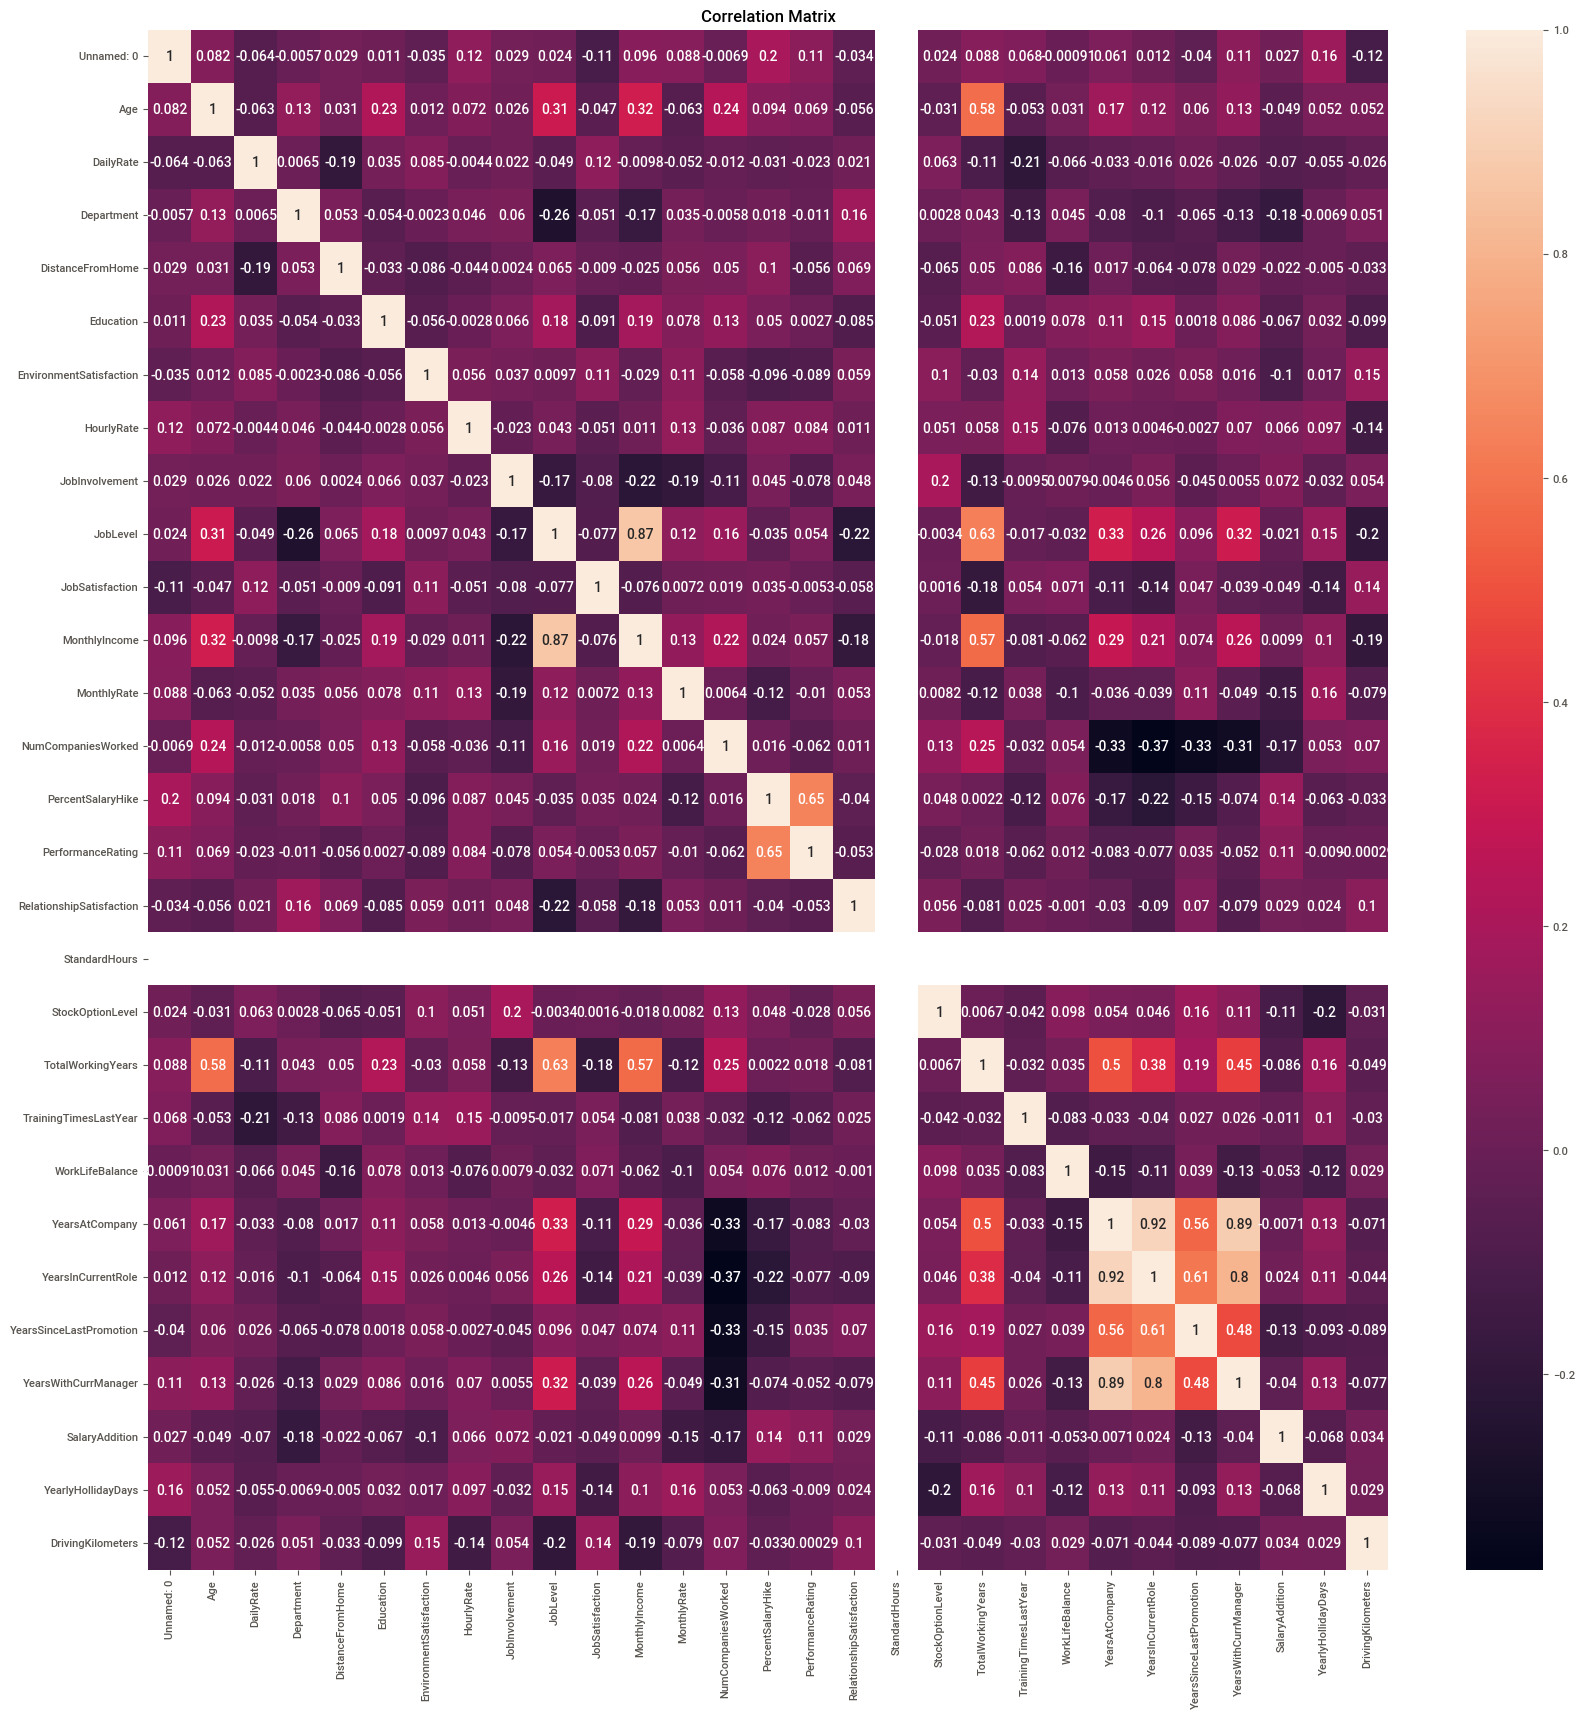

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

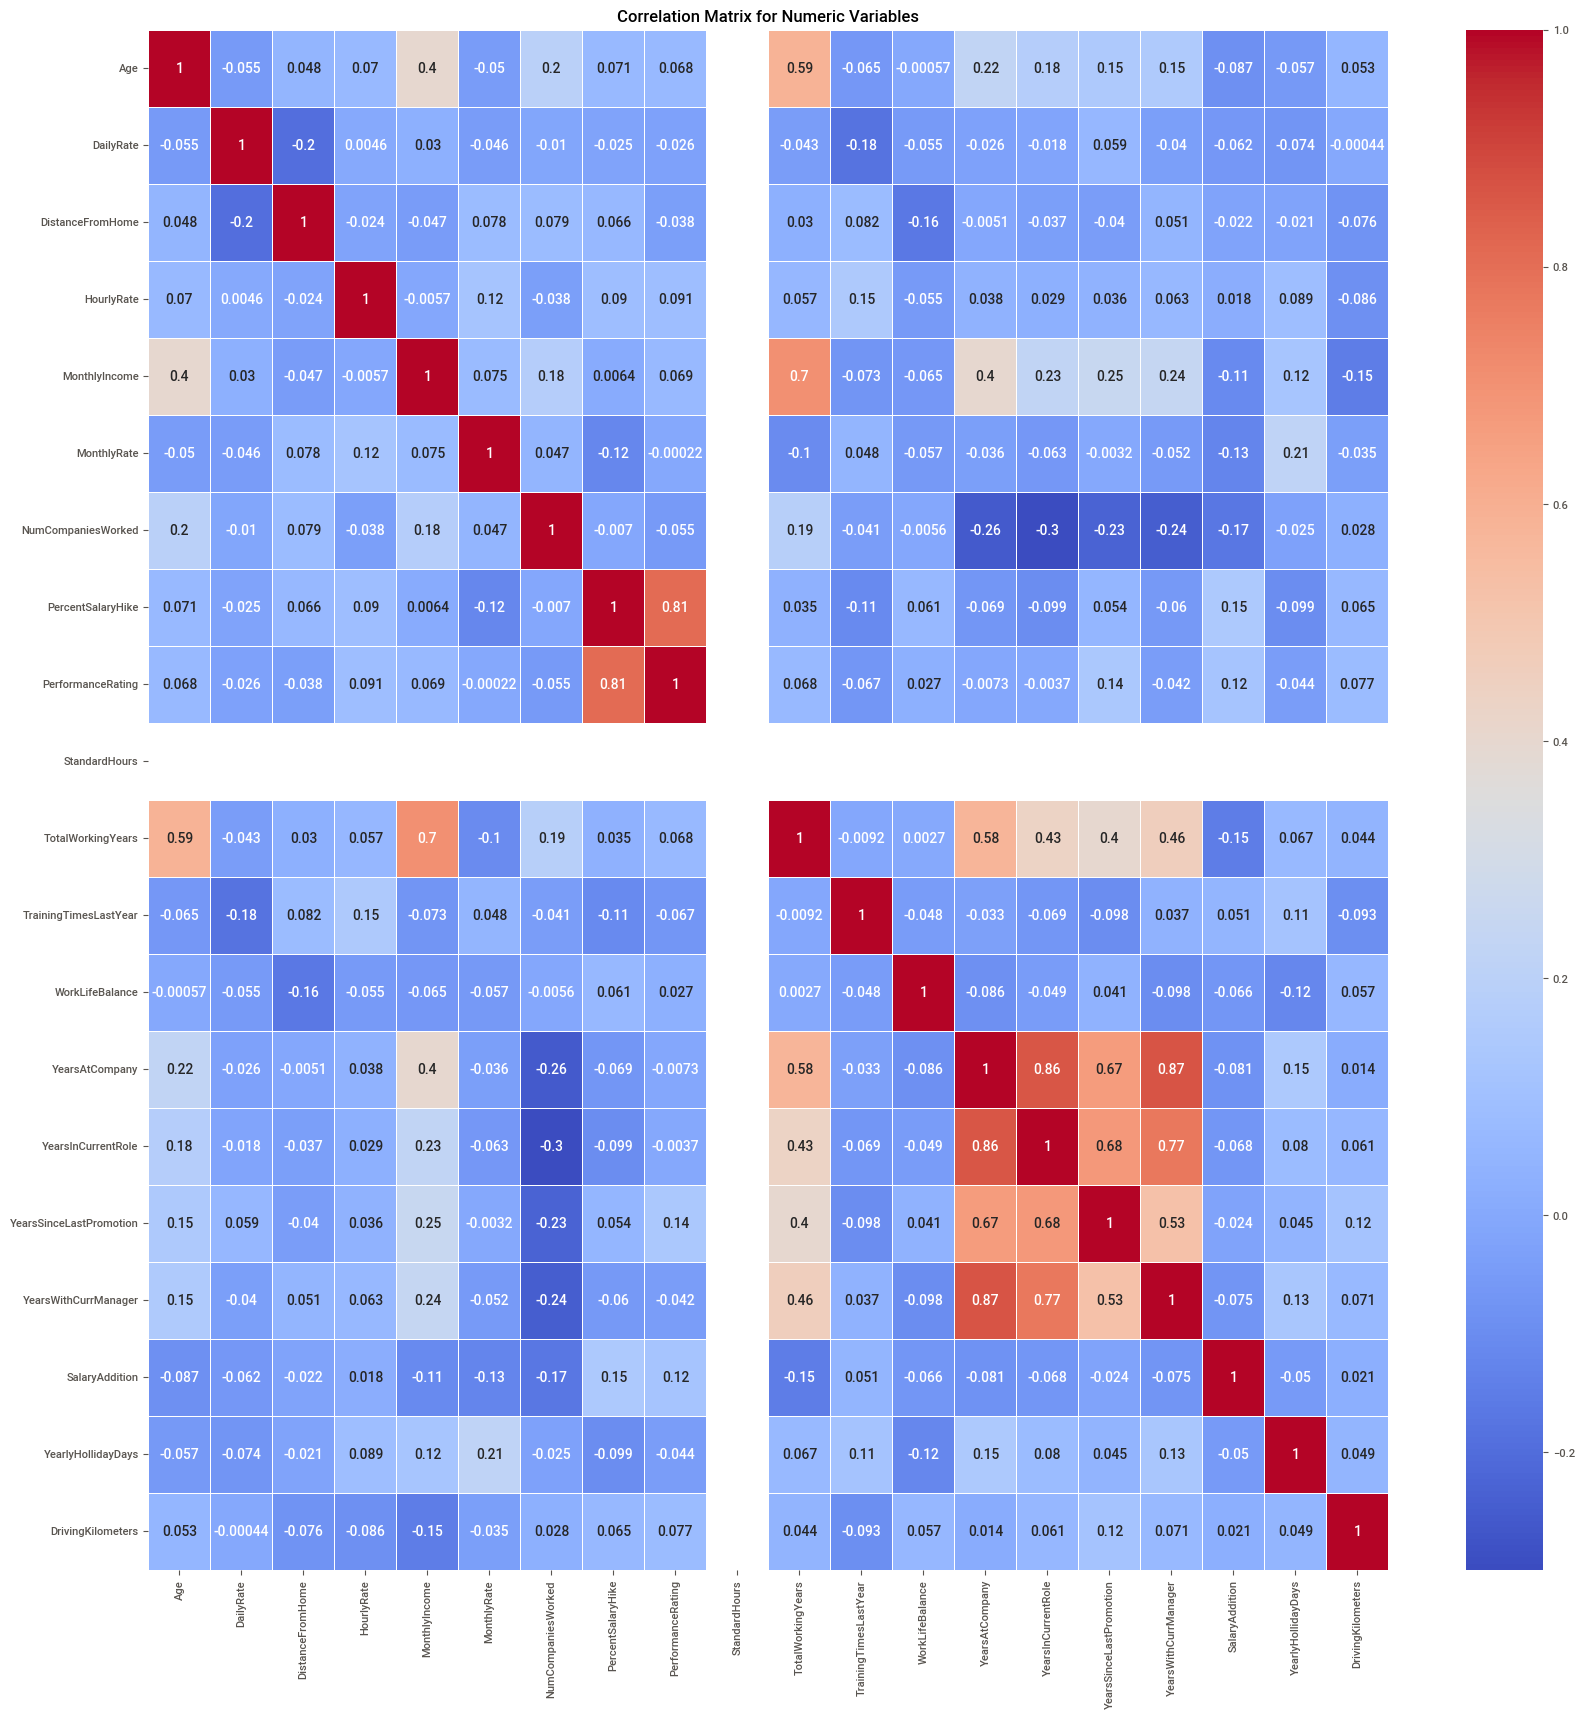

In [ ]:
#Exercise 4 -By using graphs (scatterplots) and statistical analysis, check the correlation between the numeric variables.
#Matrix
continuous = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
              'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
              'SalaryAddition', 'YearlyHollidayDays', 'DrivingKilometers']

numeric_columns = df2[continuous]

corr_matrix = numeric_columns.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Numeric Variables')
plt.show()

In [ ]:
from scipy import stats
import pandas as pd

# Assuming df2 is your cleaned dataframe ready for analysis
continuous_variables = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
                        'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StandardHours',
                        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
                        'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
                        'SalaryAddition', 'YearlyHollidayDays', 'DrivingKilometers']

# Initialize an empty list to store results
all_significant_correlations = []

# Iterate through each variable in the list to calculate Spearman correlation with every other variable
for i, var1 in enumerate(continuous_variables):
    for var2 in continuous_variables[i+1:]:
        # Calculate Spearman correlation and p-value
        cor, pvalue = stats.spearmanr(df2[var1], df2[var2])

        # Check if the correlation is statistically significant
        if pvalue < 0.05 and cor>=0.3:
            all_significant_correlations.append((var1, var2, cor, pvalue))

# Convert the list of significant correlations to a DataFrame for easier analysis
significant_correlations_df = pd.DataFrame(all_significant_correlations, columns=['Variable 1', 'Variable 2', 'Correlation', 'P-value'])

# Sort by absolute value of correlation to highlight stronger correlations
significant_correlations_df['Abs Correlation'] = significant_correlations_df['Correlation'].abs()
significant_correlations_df = significant_correlations_df.sort_values(by='Abs Correlation', ascending=False).drop(columns='Abs Correlation')

print(significant_correlations_df.head(20))  # Displaying top 20 results for brevity






                 Variable 1               Variable 2  Correlation  \
7            YearsAtCompany       YearsInCurrentRole     0.917416   
9            YearsAtCompany     YearsWithCurrManager     0.891364   
11       YearsInCurrentRole     YearsWithCurrManager     0.804899   
3         PercentSalaryHike        PerformanceRating     0.645367   
10       YearsInCurrentRole  YearsSinceLastPromotion     0.611406   
1                       Age        TotalWorkingYears     0.580422   
2             MonthlyIncome        TotalWorkingYears     0.573696   
8            YearsAtCompany  YearsSinceLastPromotion     0.558155   
4         TotalWorkingYears           YearsAtCompany     0.497985   
12  YearsSinceLastPromotion     YearsWithCurrManager     0.480769   
6         TotalWorkingYears     YearsWithCurrManager     0.446315   
5         TotalWorkingYears       YearsInCurrentRole     0.382897   
0                       Age            MonthlyIncome     0.324362   

         P-value  
7   2.906480e-

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [ ]:
new_df = pd.DataFrame(significant_correlations_df)
new_df

Variable 1               Variable 2  Correlation  \
7            YearsAtCompany       YearsInCurrentRole     0.917416   
9            YearsAtCompany     YearsWithCurrManager     0.891364   
11       YearsInCurrentRole     YearsWithCurrManager     0.804899   
3         PercentSalaryHike        PerformanceRating     0.645367   
10       YearsInCurrentRole  YearsSinceLastPromotion     0.611406   
1                       Age        TotalWorkingYears     0.580422   
2             MonthlyIncome        TotalWorkingYears     0.573696   
8            YearsAtCompany  YearsSinceLastPromotion     0.558155   
4         TotalWorkingYears           YearsAtCompany     0.497985   
12  YearsSinceLastPromotion     YearsWithCurrManager     0.480769   
6         TotalWorkingYears     YearsWithCurrManager     0.446315   
5         TotalWorkingYears       YearsInCurrentRole     0.382897   
0                       Age            MonthlyIncome     0.324362   

         P-value  
7   2.906480e-52  
9   4.009912e-45  
11  2.433307e-30  
3   1.982095e-16  
10  1.783287e-14  
1   6.927649e-13  
2   1.458435e-12  
8   7.645985e-12  
4   2.218361e-09  
12  9.262953e-09  
6   1.290159e-07  
5   8.169176e-06  
0   1.875264e-04

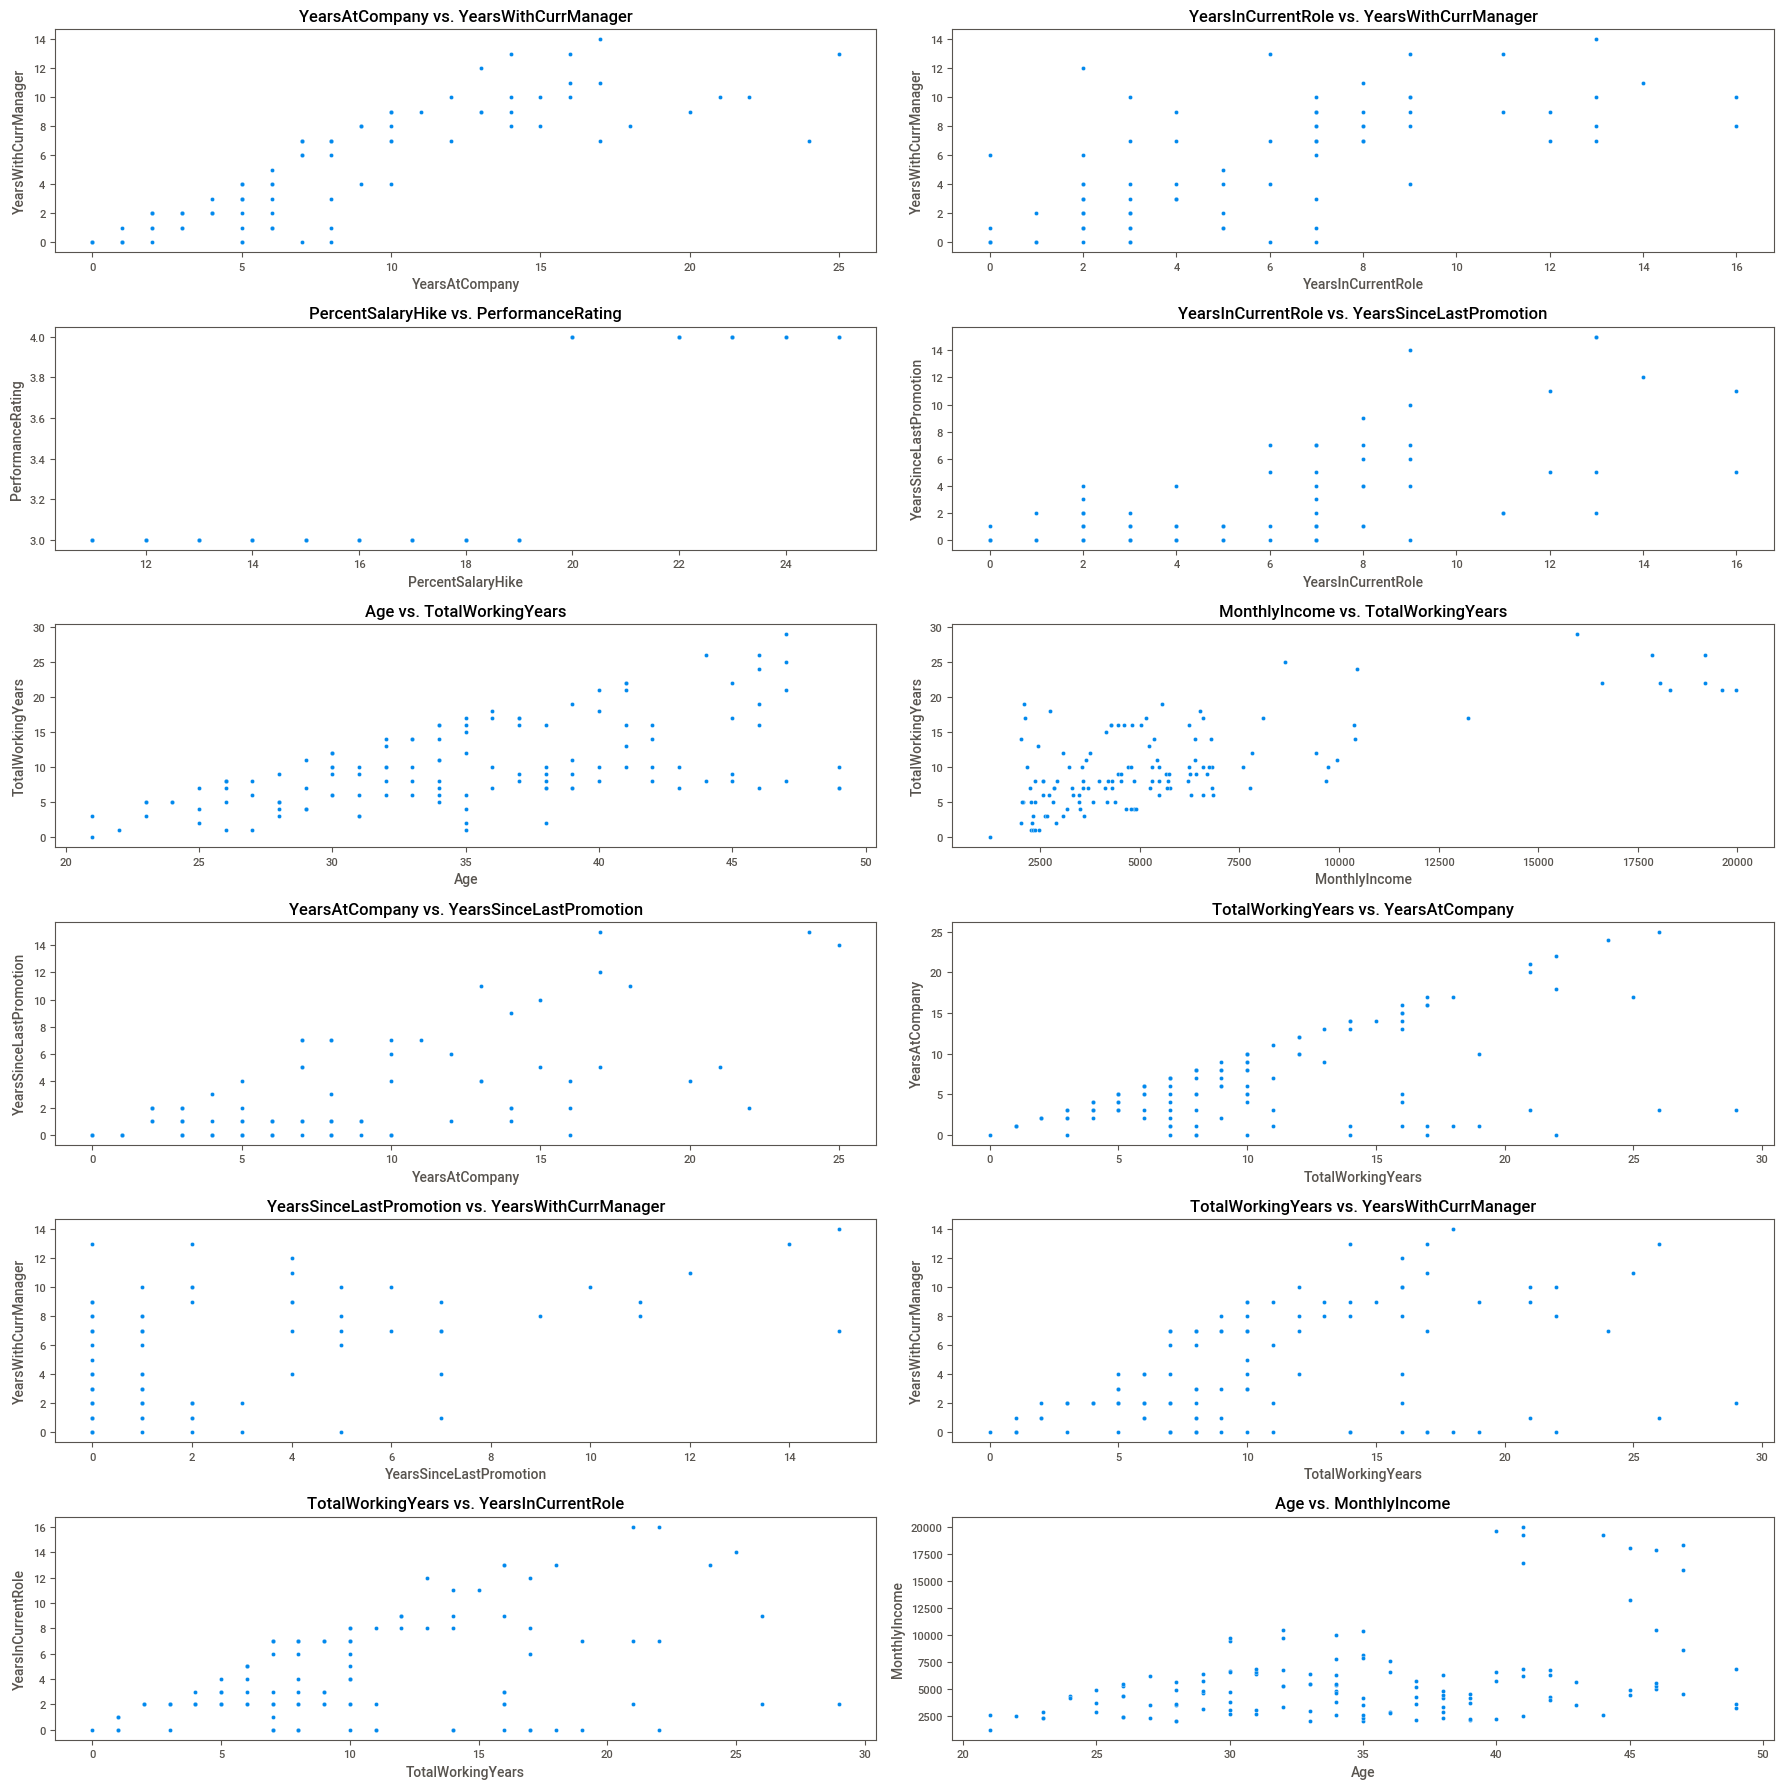

In [ ]:


# Corrected list of significant correlations for visualization
all_significant_correlations = [
    ('YearsAtCompany', 'YearsWithCurrManager'),
    ('YearsInCurrentRole', 'YearsWithCurrManager'),
    ('PercentSalaryHike', 'PerformanceRating'),
    ('YearsInCurrentRole', 'YearsSinceLastPromotion'),
    ('Age', 'TotalWorkingYears'),
    ('MonthlyIncome', 'TotalWorkingYears'),
    ('YearsAtCompany', 'YearsSinceLastPromotion'),
    ('TotalWorkingYears', 'YearsAtCompany'),
    ('YearsSinceLastPromotion', 'YearsWithCurrManager'),
    ('TotalWorkingYears', 'YearsWithCurrManager'),
    ('TotalWorkingYears', 'YearsInCurrentRole'),
    ('Age', 'MonthlyIncome')  # Corrected the typo here by removing the extra space
]

# Setting up the matplotlib figure
plt.figure(figsize=(18, 18))  # Adjusting figure size to accommodate all scatterplots

for i, pair in enumerate(all_significant_correlations, 1):
    plt.subplot(6, 2, i)  # Adjusting subplot grid to fit all plots
    sns.scatterplot(data=df2, x=pair[0], y=pair[1])
    plt.title(f'{pair[0]} vs. {pair[1]}')

plt.tight_layout()
plt.show()


In [ ]:

test_df = pd.read_csv("/content/hrm-employee-attrition_unclean.csv")
object_columns = test_df.select_dtypes(include=['object']).columns



for column in object_columns:
    value_counts = test_df[column].value_counts()
    print("In", column, "column, we have those values counts: ", value_counts)


In Attrition column, we have those values counts:  No     1233
Yes     237
Name: Attrition, dtype: int64
In BusinessTravel column, we have those values counts:  Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
In Department column, we have those values counts:  Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
In EducationField column, we have those values counts:  Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
In Gender column, we have those values counts:  Male      882
Female    588
Name: Gender, dtype: int64
In JobRole column, we have those values counts:  Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
M

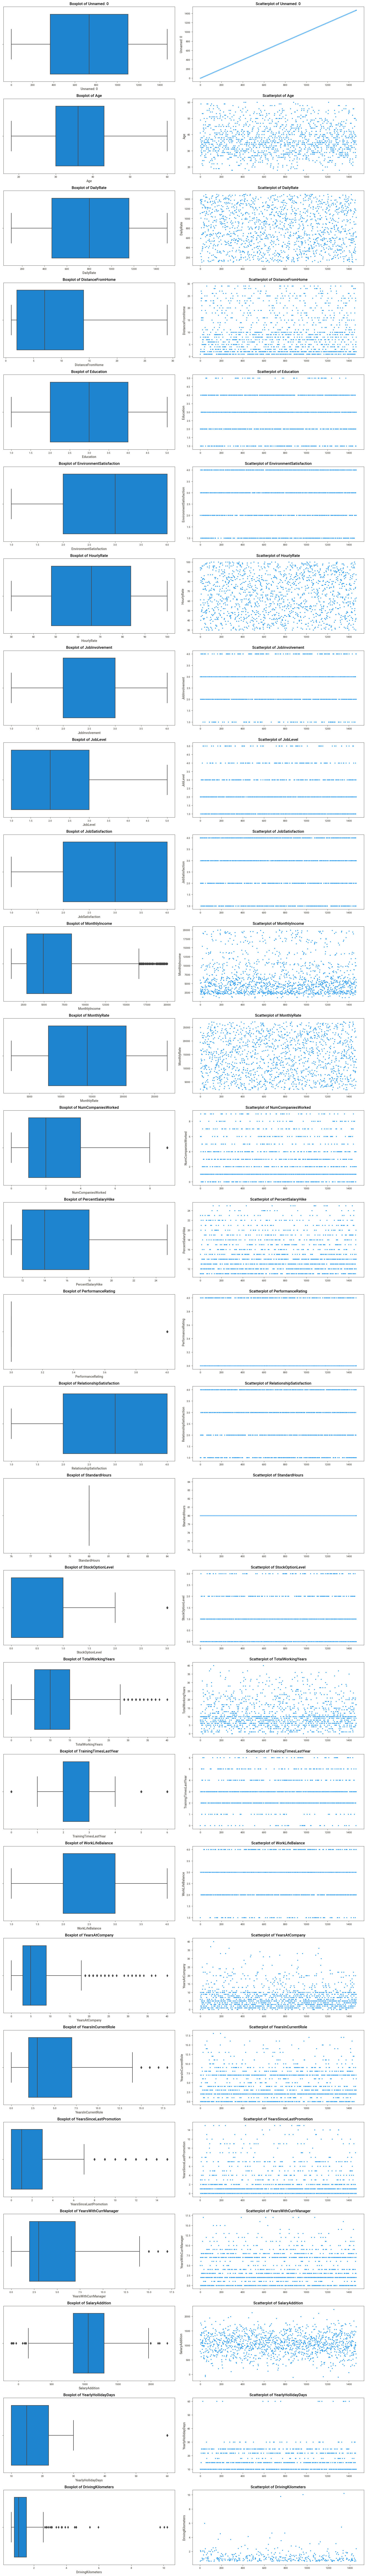

In [ ]:
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'test_df' is your DataFrame
vn = test_df.columns

# Adjusting the subplot layout to accommodate both types of plots for each numeric variable
# Assuming you have N numeric variables, you need N rows (2 plots per variable)
num_numeric_vars = sum(is_numeric_dtype(test_df[col]) for col in vn)
fig, ax = plt.subplots(num_numeric_vars, 2, figsize=(16, num_numeric_vars*4))  # Adjusting the number of rows based on numeric variables

plot_row = 0  # Tracks which row of subplots to use for the next set of plots
for col in vn:
    if is_numeric_dtype(test_df[col]):
        # Boxplot on the left
        sns.boxplot(ax=ax[plot_row, 0], data=test_df, x=col).set(title=f'Boxplot of {col}')
        # Scatterplot on the right
        sns.scatterplot(ax=ax[plot_row, 1], data=test_df, x=test_df.index, y=col).set(title=f'Scatterplot of {col}')
        plot_row += 1  # Move to the next row for the next numeric variable

plt.tight_layout()
plt.show()


In [ ]:
## for only a vector of values
def zscore(x):
    return (x - np.mean(x)) / np.std(x)

## for an array or dataframe
def zscores(values):
    return zscore(values,axis=0,nan_policy='omit')

Minimal value is: -1.7308729422115934
Maximal value is: 1.7308729422115934
All values are:
 0      -1.730873
1      -1.728516
2      -1.726160
3      -1.723803
4      -1.721447
          ...   
1465    1.721447
1466    1.723803
1467    1.726160
1468    1.728516
1469    1.730873
Name: Unnamed: 0, Length: 1470, dtype: float64
Minimal value is: -2.072192177156677
Maximal value is: 2.526885578888087
All values are:
 0       0.446350
1       1.322365
2       0.008343
3      -0.429664
4      -1.086676
          ...   
1465   -0.101159
1466    0.227347
1467   -1.086676
1468    1.322365
1469   -0.320163
Name: Age, Length: 1470, dtype: float64
Minimal value is: -1.736575696709749
Maximal value is: 1.7267301192801021
All values are:
 0       0.742527
1      -1.297775
2       1.414363
3       1.461466
4      -0.524295
          ...   
1465    0.202082
1466   -0.469754
1467   -1.605183
1468    0.546677
1469   -0.432568
Name: DailyRate, Length: 1470, dtype: float64
Minimal value is: -1.010909342912

<ipython-input-128-db3920102260>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,2,figsize=(14,4))


Minimal value is: -1.1676872598353414
Maximal value is: 3.8020738621275236
All values are:
 0      -0.063296
1       0.764998
2      -1.167687
3       0.764998
4      -0.615492
          ...   
1465   -0.615492
1466    0.764998
1467   -0.615492
1468    0.488900
1469   -0.339394
Name: YearsInCurrentRole, Length: 1470, dtype: float64
Minimal value is: nan
Maximal value is: nan
All values are:
 0            NaN
1      -0.370859
2      -0.679053
3       0.245530
4      -0.062665
          ...   
1465   -0.679053
1466   -0.370859
1467   -0.679053
1468   -0.679053
1469   -0.370859
Name: YearsSinceLastPromotion, Length: 1470, dtype: float64
Minimal value is: -1.1559347102263289
Maximal value is: 3.6100788863016295
All values are:
 0       0.245834
1       0.806541
2      -1.155935
3      -1.155935
4      -0.595227
          ...   
1465   -0.314873
1466    0.806541
1467   -0.314873
1468    1.086895
1469   -0.595227
Name: YearsWithCurrManager, Length: 1470, dtype: float64
Minimal value is: -3.2

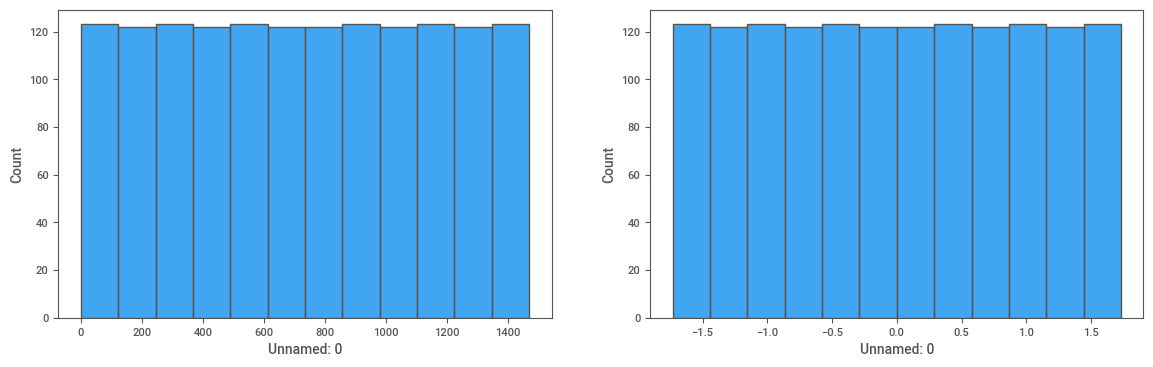

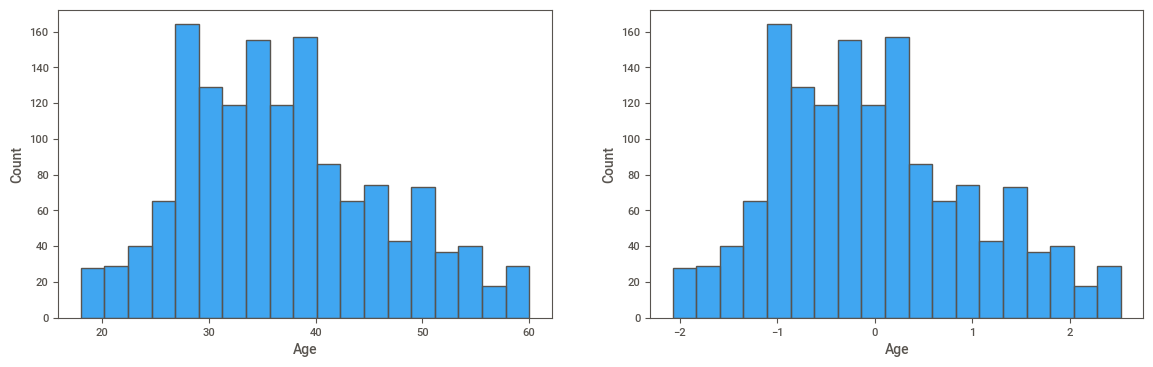

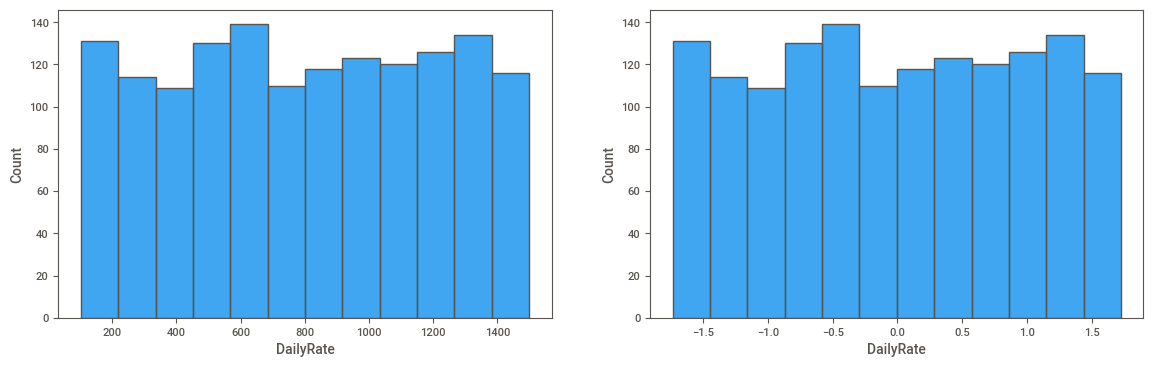

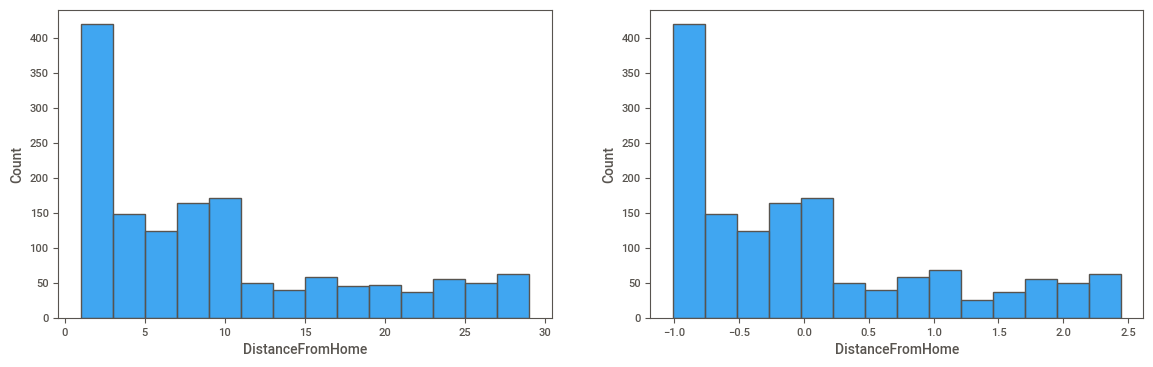

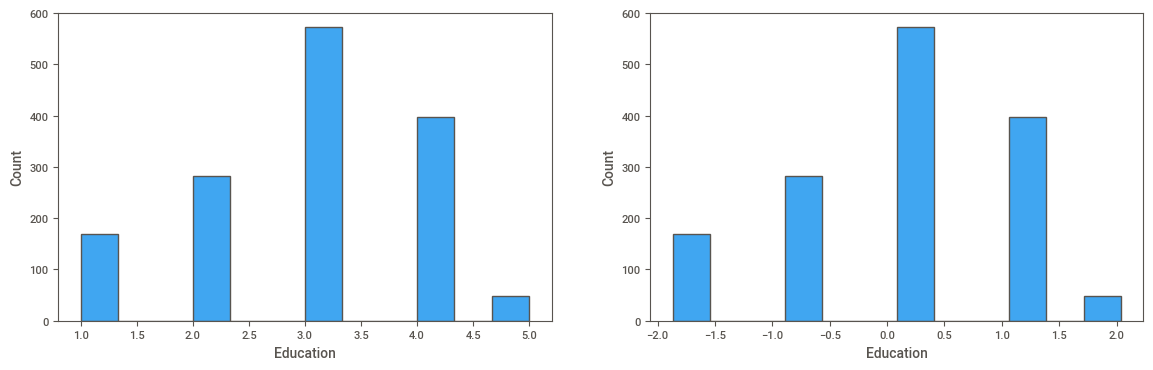

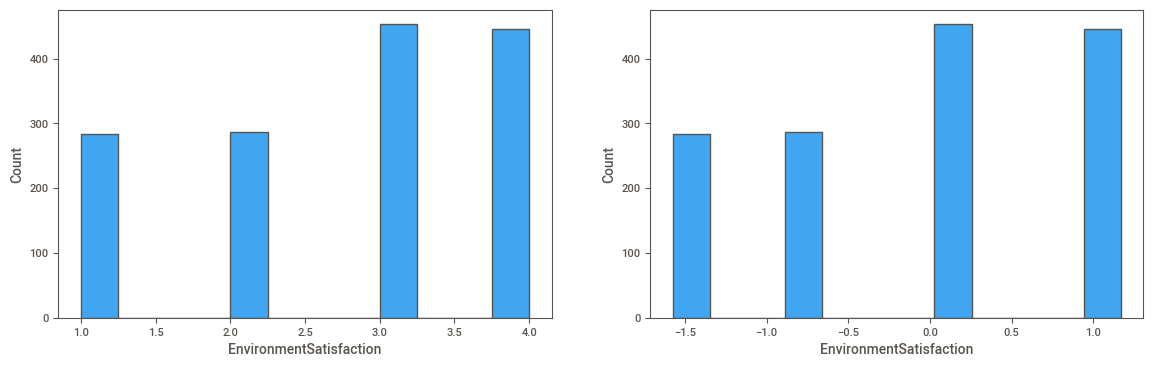

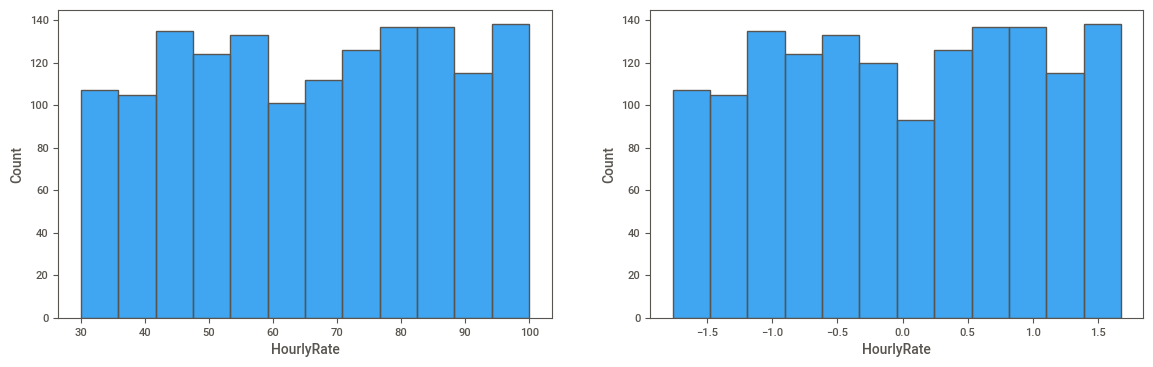

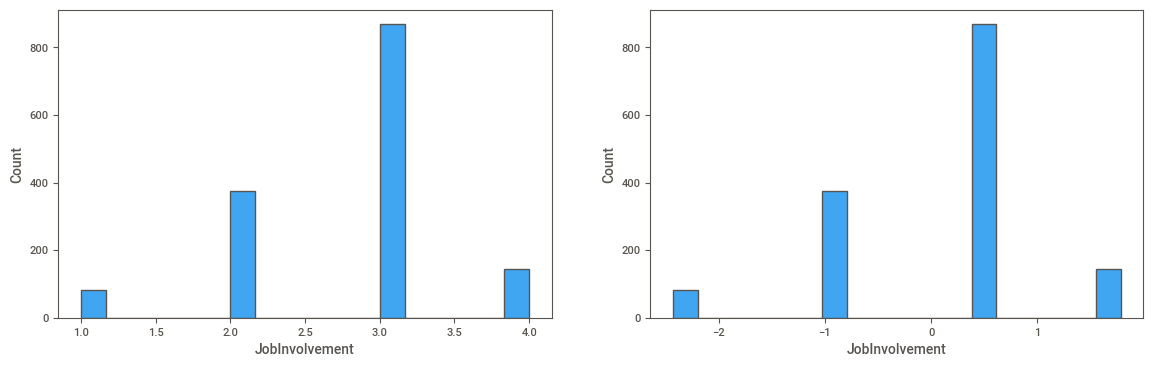

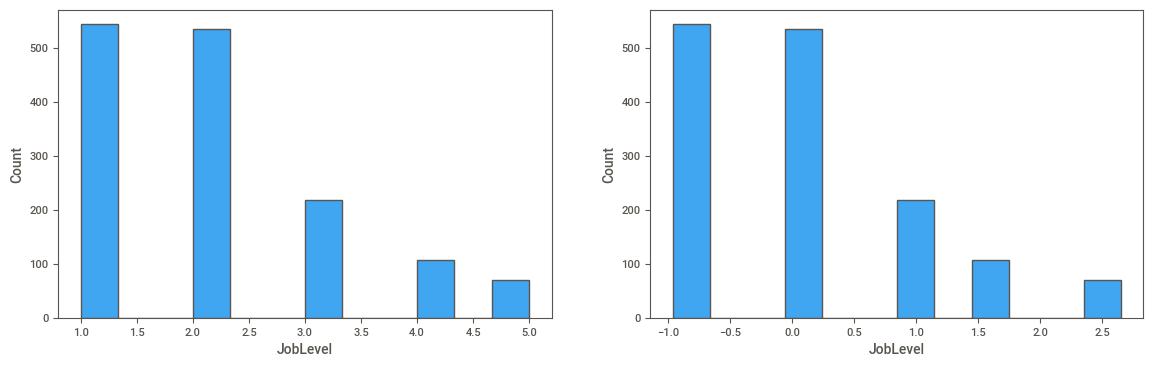

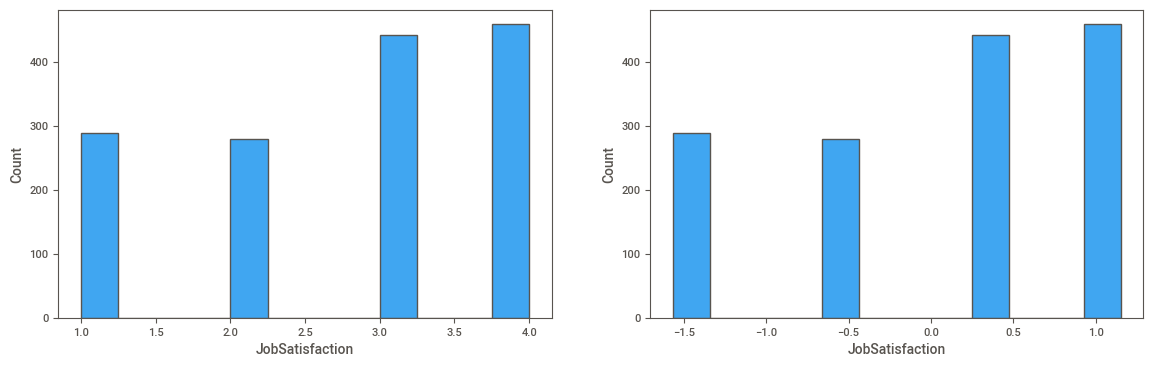

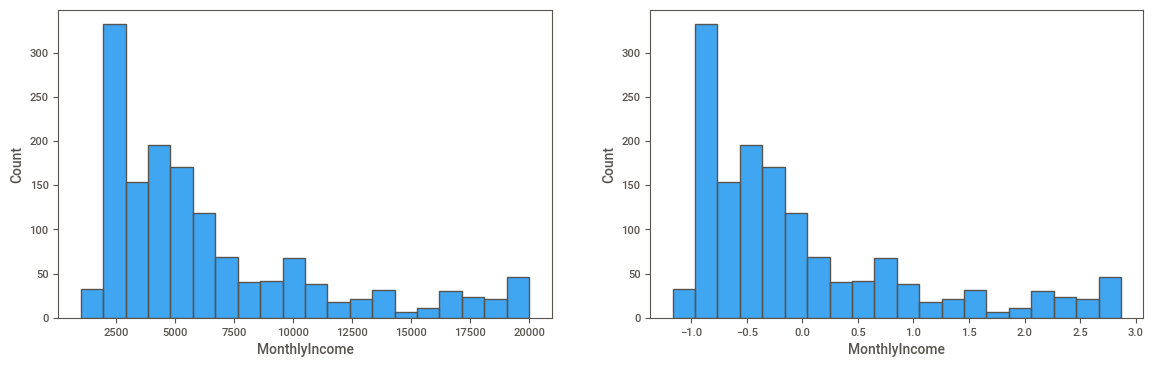

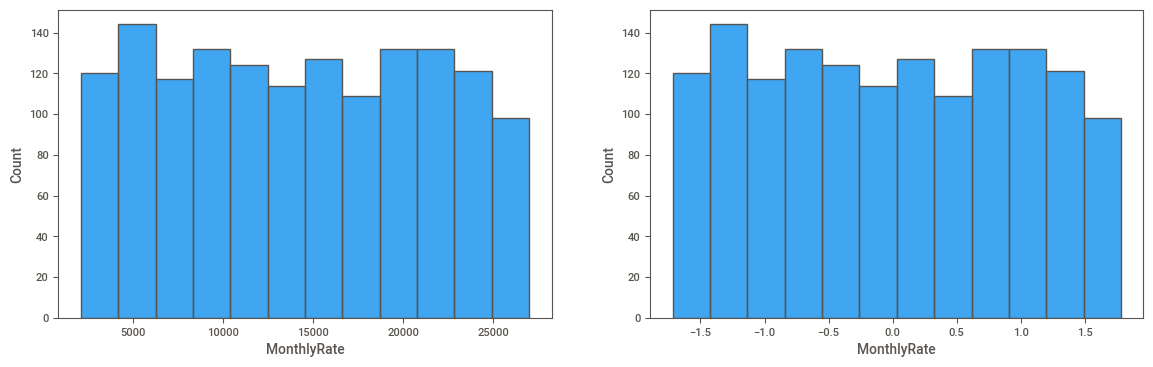

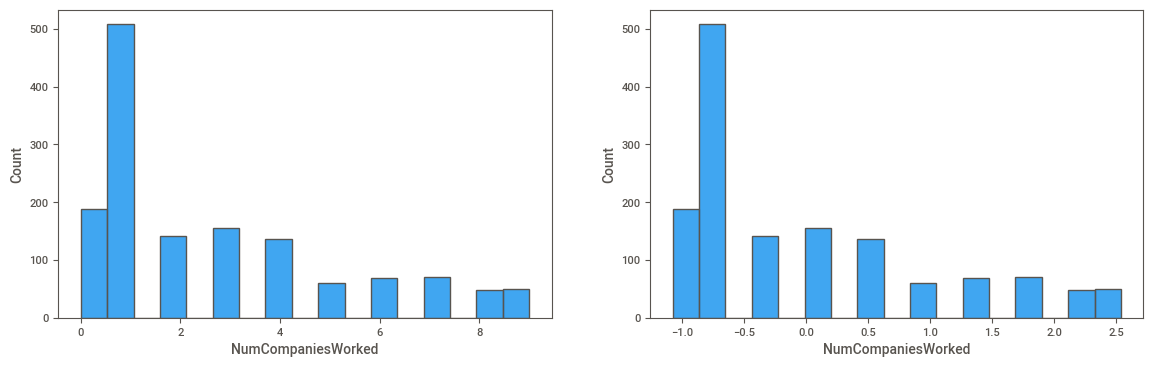

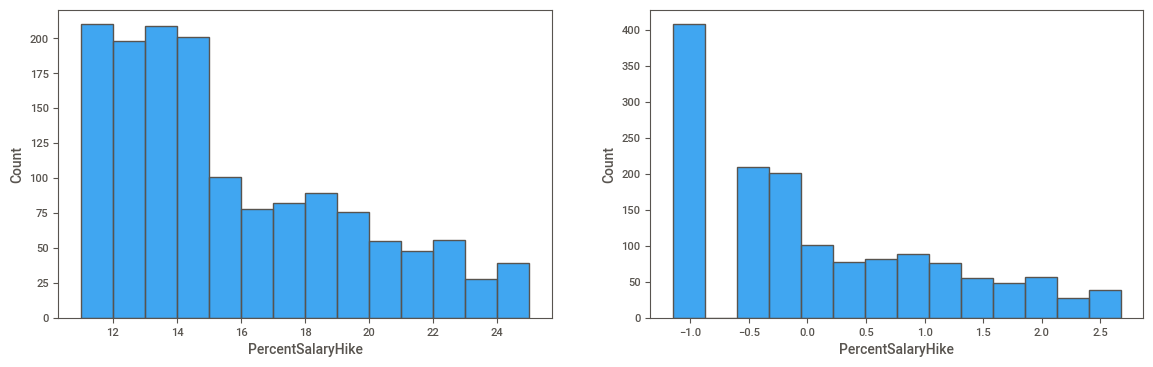

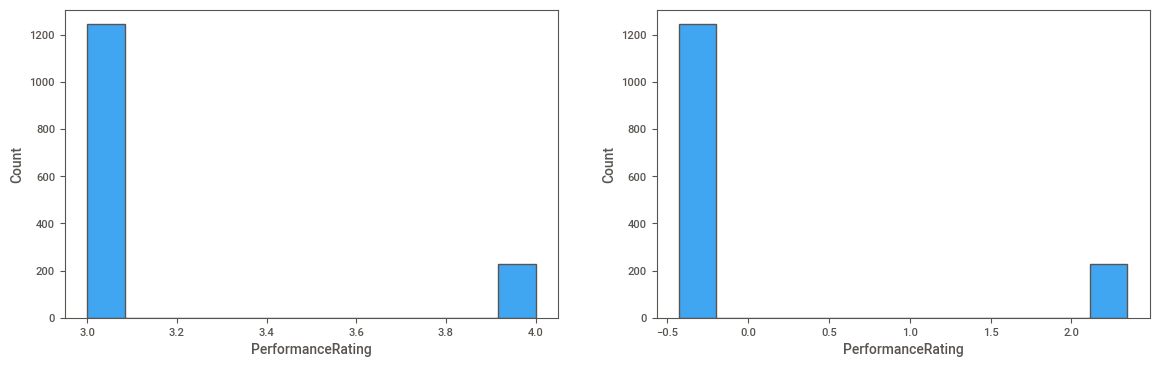

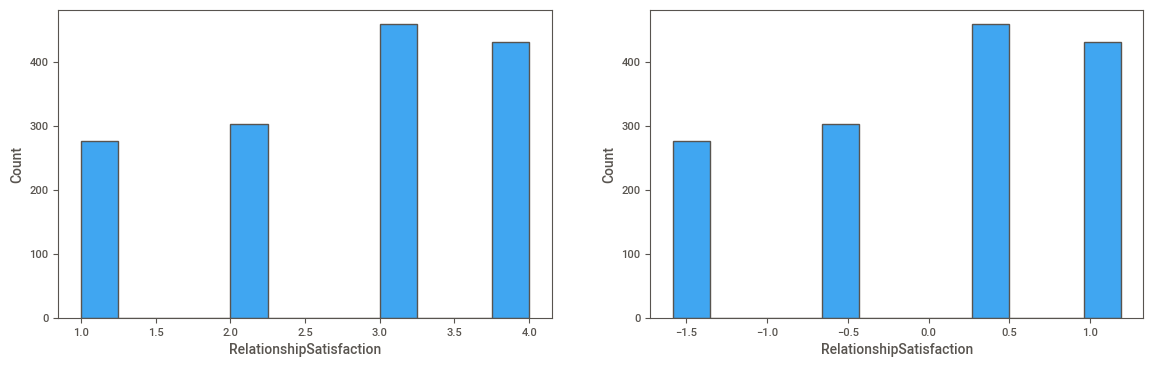

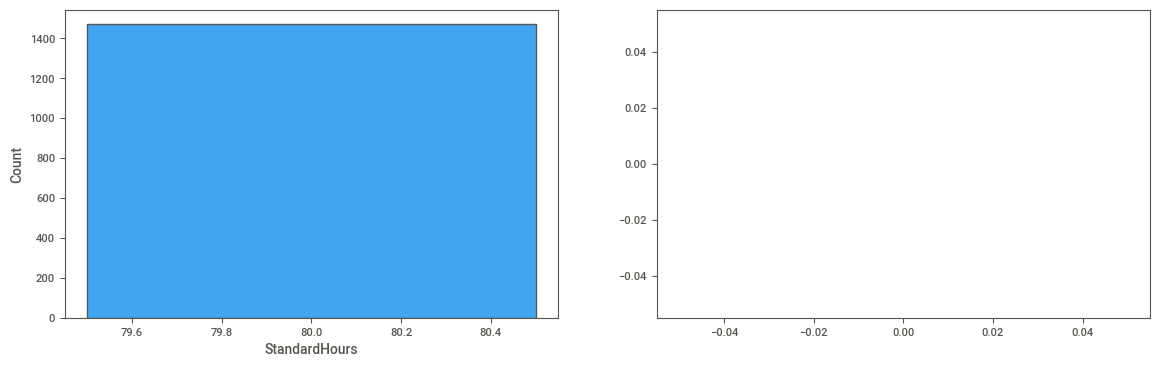

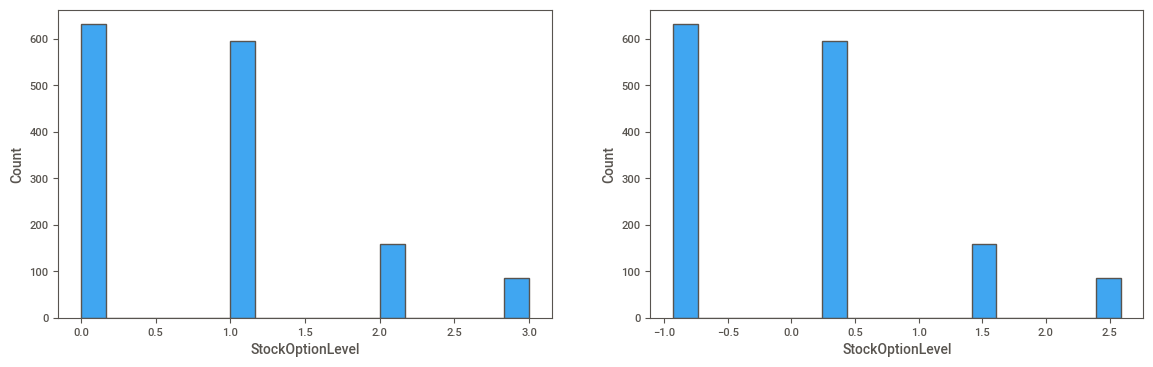

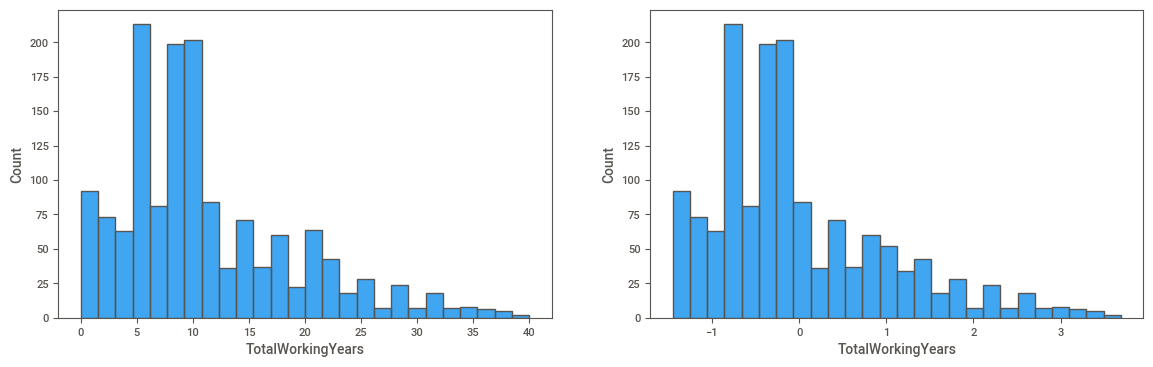

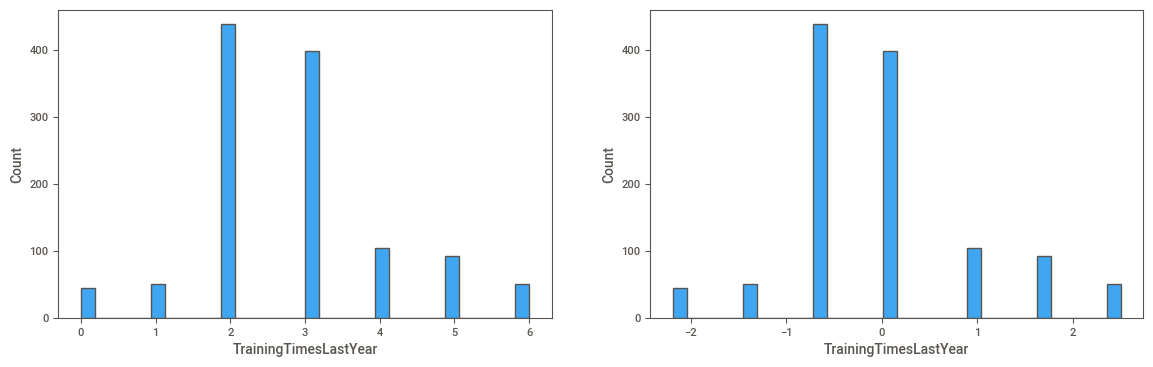

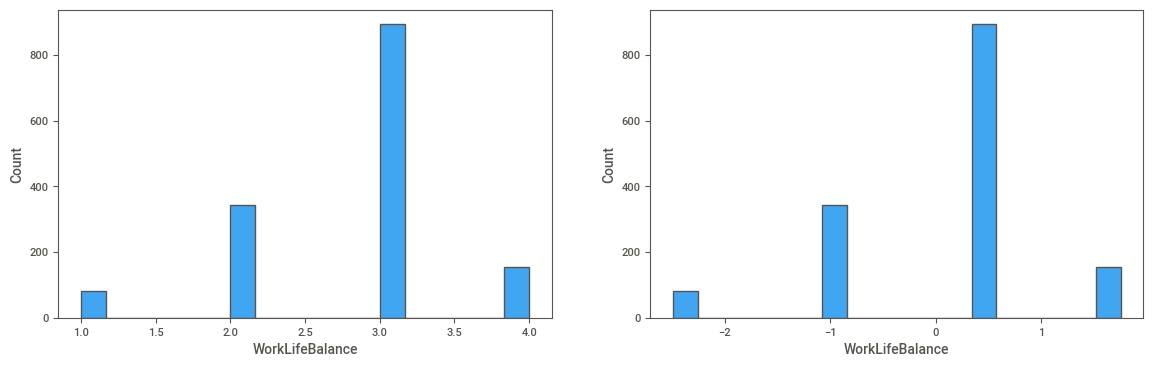

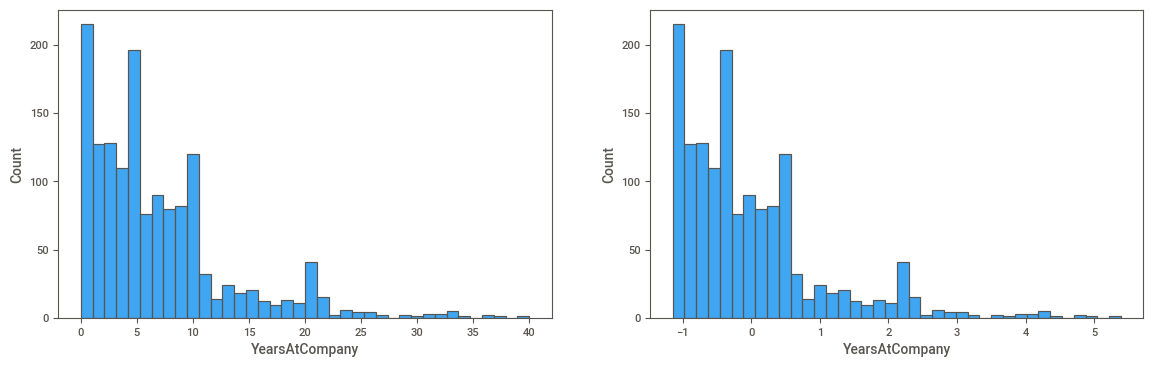

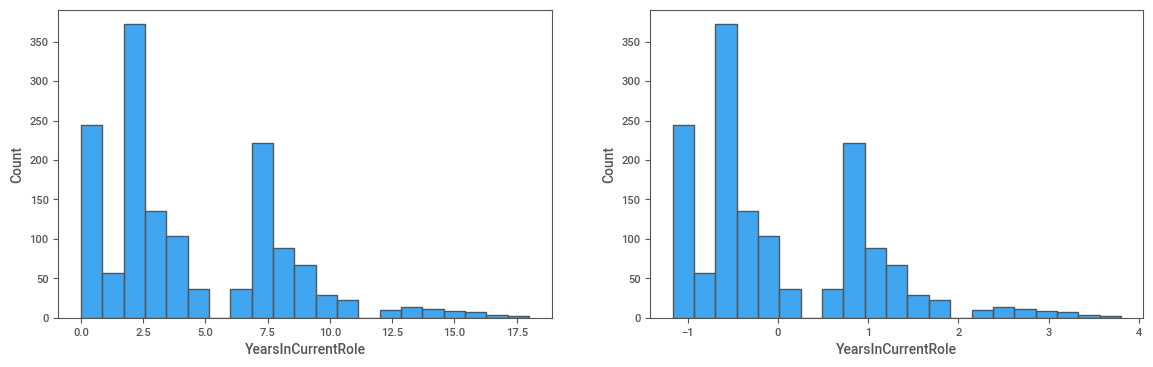

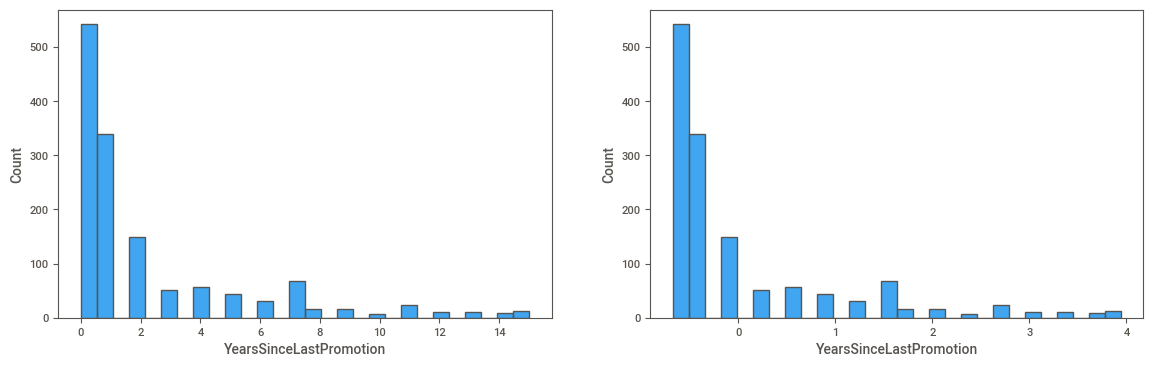

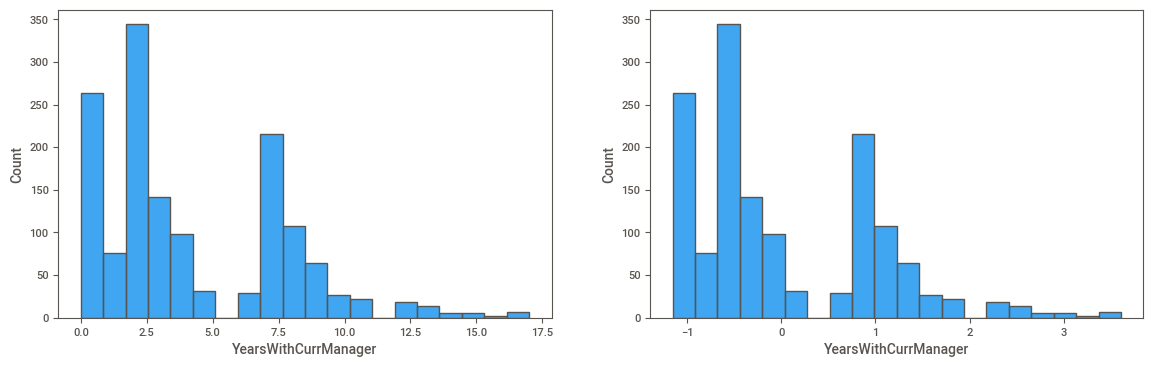

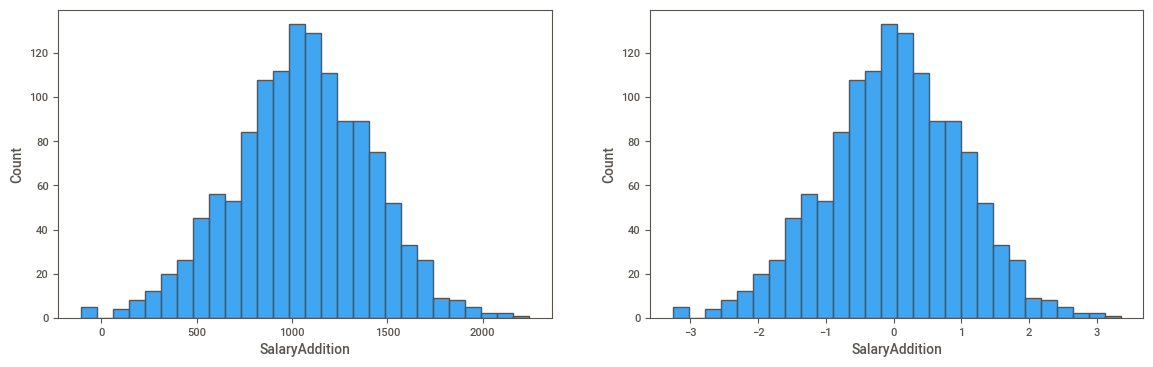

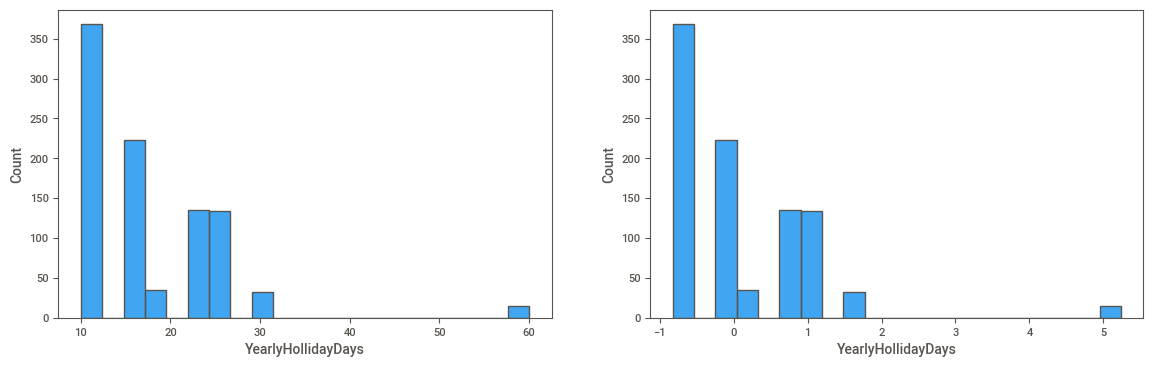

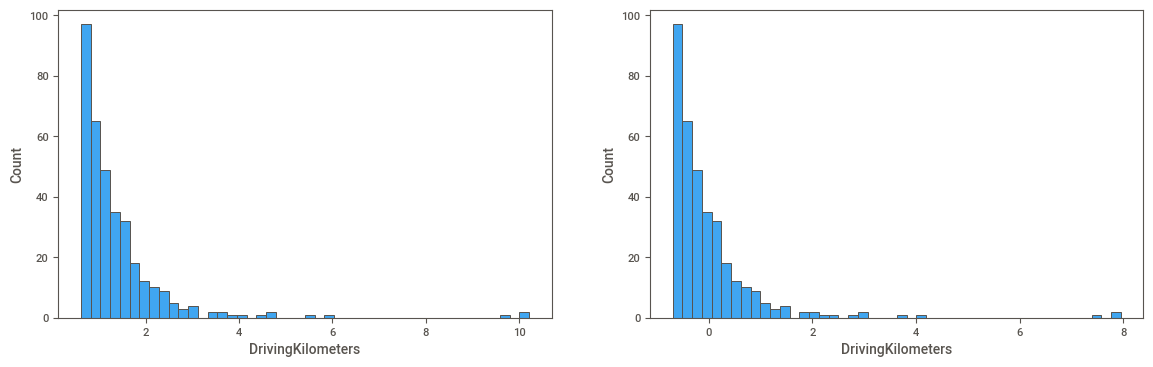

In [ ]:

numerical_columns = test_df.select_dtypes(include=['int', 'float']).columns

for column in numerical_columns:
    zsc_bp = zscore(test_df[column])
    print("Minimal value is:", min(zsc_bp))
    print("Maximal value is:", max(zsc_bp))
    print("All values are:\n", zsc_bp)
    fig, ax = plt.subplots(1,2,figsize=(14,4))
    sns.histplot(ax=ax[0], x=test_df[column])
    sns.histplot(ax=ax[1], x=zsc_bp)

In [ ]:
df_continous = test_df[numerical_columns]
df_continous


Unnamed: 0   Age  DailyRate  DistanceFromHome  Education  \
0              0  41.0     1102.0               1.0          2   
1              1  49.0      279.0               8.0          1   
2              2  37.0     1373.0               2.0          2   
3              3  33.0     1392.0               3.0          4   
4              4  27.0      591.0               2.0          1   
...          ...   ...        ...               ...        ...   
1465        1465  36.0      884.0              23.0          2   
1466        1466  39.0      613.0               6.0          1   
1467        1467  27.0      155.0               4.0          3   
1468        1468  49.0     1023.0               2.0          3   
1469        1469  34.0      628.0               8.0          3   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                         2.0        94.0             3.0       2.0   
1                         3.0        61.0             2.0       2.0   
2                         4.0        92.0             2.0       1.0   
3                         4.0        56.0             3.0       1.0   
4                         1.0        40.0             3.0       1.0   
...                       ...         ...             ...       ...   
1465                      3.0        41.0             4.0       2.0   
1466                      4.0        42.0             2.0       3.0   
1467                      2.0        87.0             4.0       2.0   
1468                      4.0        63.0             2.0       2.0   
1469                      2.0        82.0             4.0       2.0   

      JobSatisfaction  ...  TotalWorkingYears  TrainingTimesLastYear  \
0                 4.0  ...                8.0                    0.0   
1                 2.0  ...               10.0                    3.0   
2                 3.0  ...                7.0                    3.0   
3                 3.0  ...                8.0                    3.0   
4                 2.0  ...                6.0                    3.0   
...               ...  ...                ...                    ...   
1465              4.0  ...               17.0                    NaN   
1466              1.0  ...                9.0                    5.0   
1467              2.0  ...                6.0                    0.0   
1468              2.0  ...               17.0                    3.0   
1469              3.0  ...                6.0                    3.0   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                 1.0             6.0                 4.0   
1                 3.0            10.0                 7.0   
2                 3.0             0.0                 0.0   
3                 3.0             8.0                 7.0   
4                 3.0             2.0                 2.0   
...               ...             ...                 ...   
1465              3.0             5.0                 2.0   
1466              3.0             7.0                 7.0   
1467              3.0             6.0                 2.0   
1468              2.0             9.0                 6.0   
1469              4.0             4.0                 3.0   

      YearsSinceLastPromotion  YearsWithCurrManager  SalaryAddition  \
0                         NaN                   5.0      792.803050   
1                         1.0                   7.0     1199.848653   
2                         0.0                   0.0     1366.620630   
3                         3.0                   0.0     1770.840125   
4                         2.0                   2.0     1043.414893   
...                       ...                   ...             ...   
1465                      0.0                   3.0     1468.084847   
1466                      1.0                   7.0      377.731602   
1467                      0.0                   3.0      701.628425   
1468                      0.0                   8.0 

In [ ]:

#To eliminate the outliers, we can determine the items that have a zscore over 2.5 (in both sides). We will do that in a new dataset copied from the original.

z1 =  zscore(df_continous.loc[:,df_continous.columns[0:28]])
z1

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Unnamed: 0       Age  DailyRate  DistanceFromHome  Education  \
0      -1.730873  0.446350   0.742527         -1.010909  -0.891688   
1      -1.728516  1.322365  -1.297775         -0.147150  -1.868426   
2      -1.726160  0.008343   1.414363         -0.887515  -0.891688   
3      -1.723803 -0.429664   1.461466         -0.764121   1.061787   
4      -1.721447 -1.086676  -0.524295         -0.887515  -1.868426   
...          ...       ...        ...               ...        ...   
1465    1.721447 -0.101159   0.202082          1.703764  -0.891688   
1466    1.723803  0.227347  -0.469754         -0.393938  -1.868426   
1467    1.726160 -1.086676  -1.605183         -0.640727   0.085049   
1468    1.728516  1.322365   0.546677         -0.887515   0.085049   
1469    1.730873 -0.320163  -0.432568         -0.147150   0.085049   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                   -0.660531    1.383138        0.379672 -0.057788   
1                    0.254625   -0.240677       -1.026167 -0.057788   
2                    1.169781    1.284725       -1.026167 -0.961486   
3                    1.169781   -0.486709        0.379672 -0.961486   
4                   -1.575686   -1.274014        0.379672 -0.961486   
...                       ...         ...             ...       ...   
1465                 0.254625   -1.224807        1.785511 -0.057788   
1466                 1.169781   -1.175601       -1.026167  0.845911   
1467                -0.660531    1.038693        1.785511 -0.057788   
1468                 1.169781   -0.142264       -1.026167 -0.057788   
1469                -0.660531    0.792660        1.785511 -0.057788   

      JobSatisfaction  ...  TotalWorkingYears  TrainingTimesLastYear  \
0            1.153254  ...          -0.421642              -2.191526   
1           -0.660853  ...          -0.164511               0.157535   
2            0.246200  ...          -0.550208               0.157535   
3            0.246200  ...          -0.421642               0.157535   
4           -0.660853  ...          -0.678774               0.157535   
...               ...  ...                ...                    ...   
1465         1.153254  ...           0.735447                    NaN   
1466        -1.567907  ...          -0.293077               1.723575   
1467        -0.660853  ...          -0.678774              -2.191526   
1468        -0.660853  ...           0.735447               0.157535   
1469         0.246200  ...          -0.678774               0.157535   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0           -2.493820       -0.164613           -0.063296   
1            0.338096        0.488508            0.764998   
2            0.338096       -1.144294           -1.167687   
3            0.338096        0.161947            0.764998   
4            0.338096       -0.817734           -0.615492   
...               ...             ...                 ...   
1465         0.338096       -0.327893           -0.615492   
1466         0.338096       -0.001333            0.764998   
1467         0.338096       -0.164613           -0.615492   
1468        -1.077862        0.325228            0.488900   
1469         1.754054       -0.491174           -0.339394   

      YearsSinceLastPromotion  YearsWithCurrManager  SalaryAddition  \
0                         NaN              0.245834       -0.726987   
1                   -0.370859              0.806541        0.417913   
2                   -0.679053             -1.155935        0.886993   
3                    0.245530             -1.155935        2.023944   
4                   -0.062665             -0.595227       -0.022089   
...                       ...                   ...             ...   
1465                -0.679053             -0.314873        1.172382   
1466                -0.370859              0.806541       -1.894461   
1467                -0.679053             -0.314873       -0.983434   
1468

In [ ]:
df2 = df_continous.loc[:,df_continous.columns[0:28]].copy()
df2.head()

Unnamed: 0   Age  DailyRate  DistanceFromHome  Education  \
0           0  41.0     1102.0               1.0          2   
1           1  49.0      279.0               8.0          1   
2           2  37.0     1373.0               2.0          2   
3           3  33.0     1392.0               3.0          4   
4           4  27.0      591.0               2.0          1   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                      2.0        94.0             3.0       2.0   
1                      3.0        61.0             2.0       2.0   
2                      4.0        92.0             2.0       1.0   
3                      4.0        56.0             3.0       1.0   
4                      1.0        40.0             3.0       1.0   

   JobSatisfaction  ...  TotalWorkingYears  TrainingTimesLastYear  \
0              4.0  ...                8.0                    0.0   
1              2.0  ...               10.0                    3.0   
2              3.0  ...                7.0                    3.0   
3              3.0  ...                8.0                    3.0   
4              2.0  ...                6.0                    3.0   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0              1.0             6.0                 4.0   
1              3.0            10.0                 7.0   
2              3.0             0.0                 0.0   
3              3.0             8.0                 7.0   
4              3.0             2.0                 2.0   

   YearsSinceLastPromotion  YearsWithCurrManager  SalaryAddition  \
0                      NaN                   5.0      792.803050   
1                      1.0                   7.0     1199.848653   
2                      0.0                   0.0     1366.620630   
3                      3.0                   0.0     1770.840125   
4                      2.0                   2.0     1043.414893   

   YearlyHollidayDays  DrivingKilometers  
0                10.0                NaN  
1                 NaN                NaN  
2                 NaN                NaN  
3                10.0           0.640162  
4                10.0           2.122465  

[5 rows x 28 columns]

In [ ]:
abs(z1) < 2.5

Unnamed: 0   Age  DailyRate  DistanceFromHome  Education  \
0           True  True       True              True       True   
1           True  True       True              True       True   
2           True  True       True              True       True   
3           True  True       True              True       True   
4           True  True       True              True       True   
...          ...   ...        ...               ...        ...   
1465        True  True       True              True       True   
1466        True  True       True              True       True   
1467        True  True       True              True       True   
1468        True  True       True              True       True   
1469        True  True       True              True       True   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                        True        True            True      True   
1                        True        True            True      True   
2                        True        True            True      True   
3                        True        True            True      True   
4                        True        True            True      True   
...                       ...         ...             ...       ...   
1465                     True        True            True      True   
1466                     True        True            True      True   
1467                     True        True            True      True   
1468                     True        True            True      True   
1469                     True        True            True      True   

      JobSatisfaction  ...  TotalWorkingYears  TrainingTimesLastYear  \
0                True  ...               True                   True   
1                True  ...               True                   True   
2                True  ...               True                   True   
3                True  ...               True                   True   
4                True  ...               True                   True   
...               ...  ...                ...                    ...   
1465             True  ...               True                  False   
1466             True  ...               True                   True   
1467             True  ...               True                   True   
1468             True  ...               True                   True   
1469             True  ...               True                   True   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                True            True                True   
1                True            True                True   
2                True            True                True   
3                True            True                True   
4                True            True                True   
...               ...             ...                 ...   
1465             True            True                True   
1466             True            True                True   
1467             True            True                True   
1468             True            True                True   
1469             True            True                True   

      YearsSinceLastPromotion  YearsWithCurrManager  SalaryAddition  \
0                       False                  True            True   
1                        True                  True            True   
2                        True                  True            True   
3                        True                  True            True   
4                        True                  True            True   
...                       ...                   ...             ...   
1465                     True                  True            True   
1466                     True                  True            True   
1467                     True                  True            True   
1468                     True                  True 

Now we will check for each variable the changes in the correlation and distributions with and without the missings

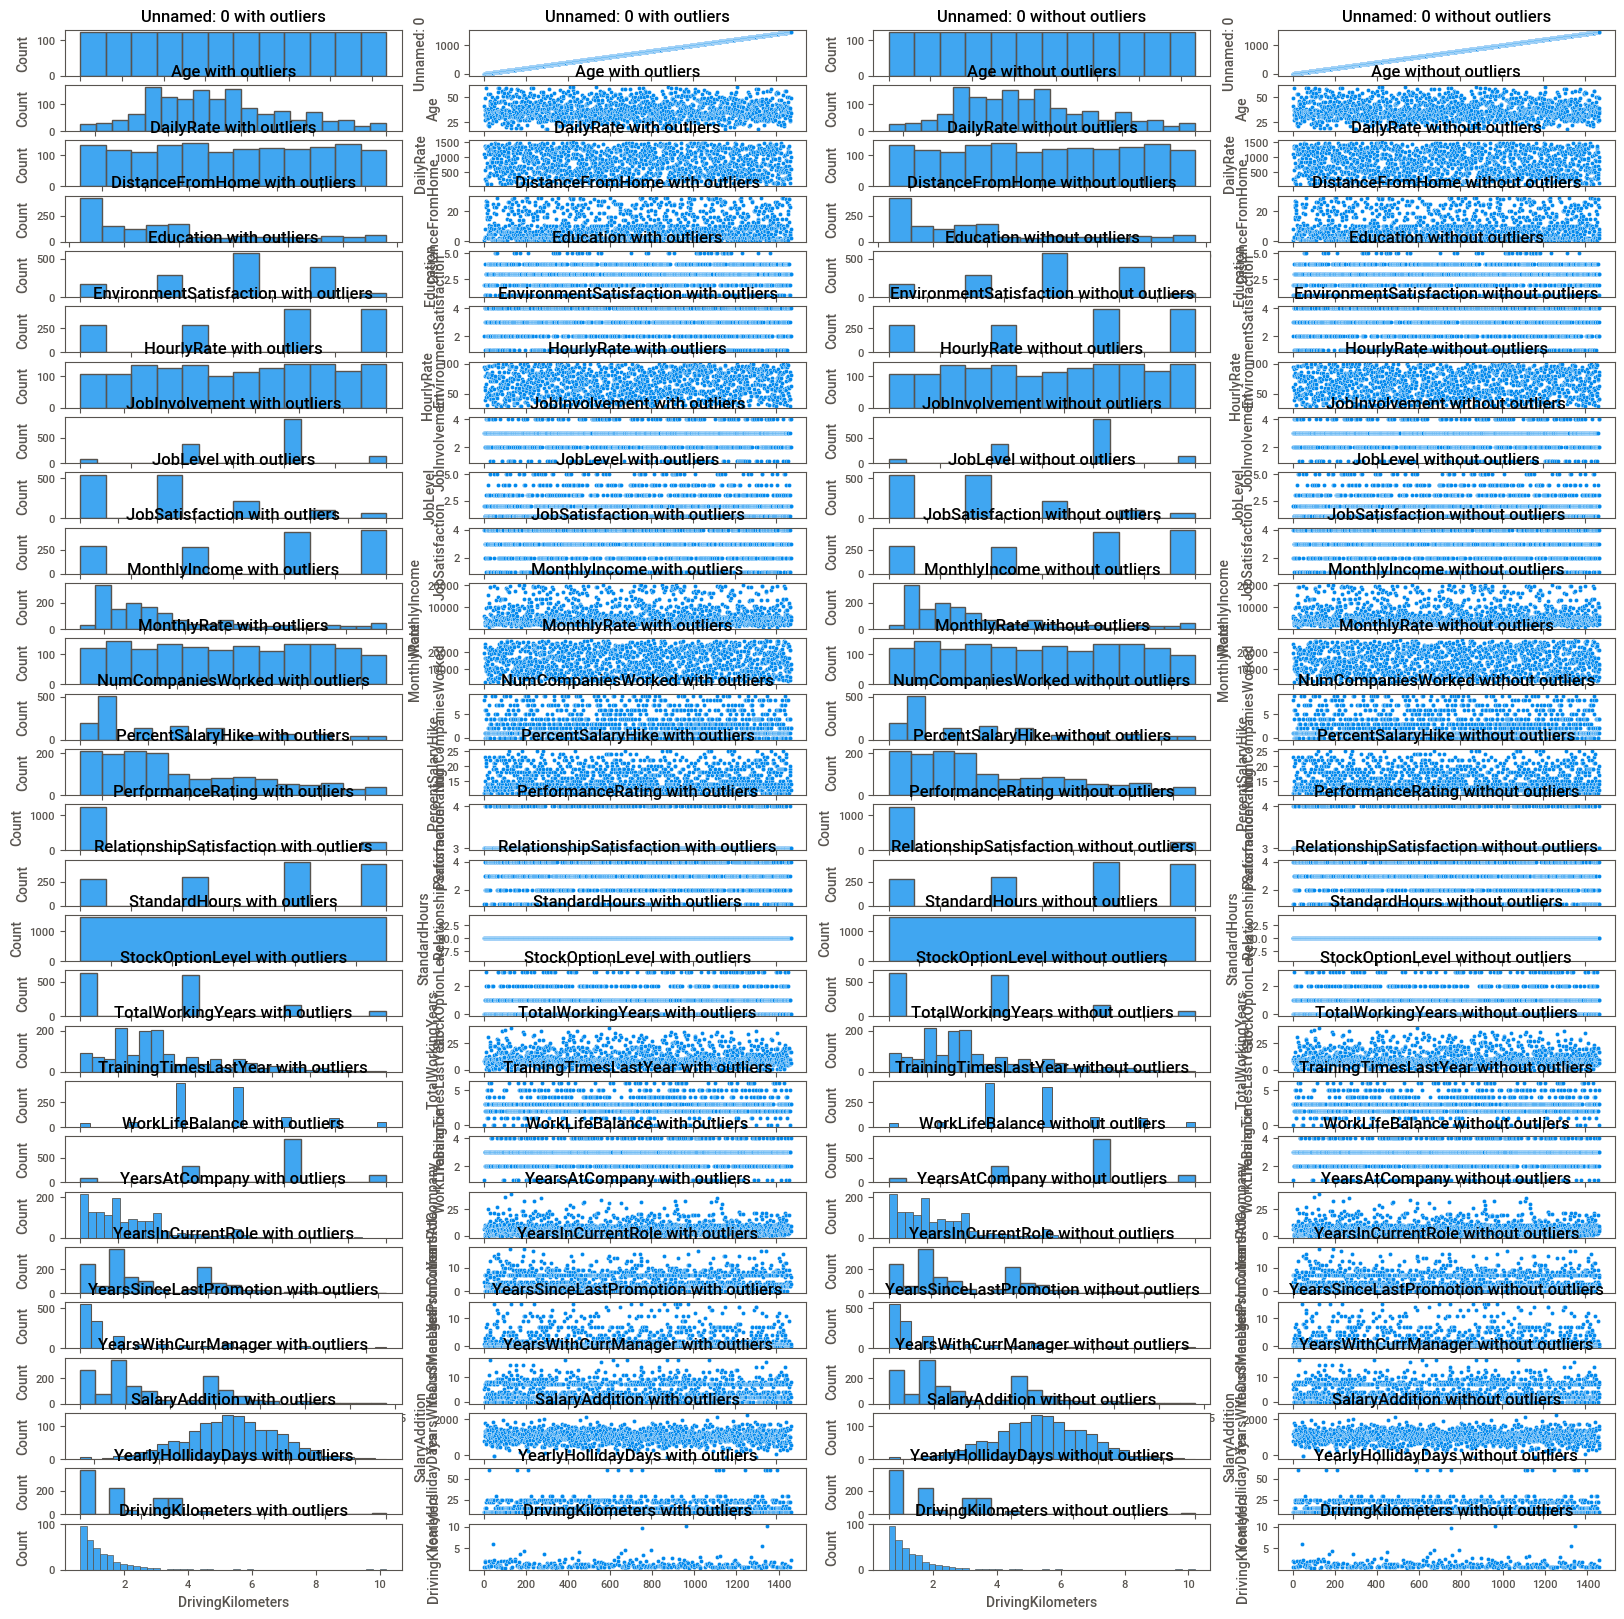

In [ ]:
vn = df2.columns

fig, ax = plt.subplots(28,4,figsize=(20,20))
n = 0
for i in range(0,df2.shape[1]):
    sns.histplot(ax=ax[n,0], x=df[vn[i]]).set(title="{} with outliers".format(vn[i]))
    sns.scatterplot(ax=ax[n,1], x=df.index, y=df[vn[i]]).set(title="{} with outliers".format(vn[i]))
    sns.histplot(ax=ax[n,2], x=df2[vn[i]]).set(title="{} without outliers".format(vn[i]))
    sns.scatterplot(ax=ax[n,3], x=df2.index, y=df2[vn[i]]).set(title="{} without outliers".format(vn[i]))
    n = n + 1

As we can see, for some of the variables it seems to be changes in their distributions. However, without the use of statistical methods we can't make any definitive conclussion. Another problem we see in the data is that the distribution of most of the variables have no normal distribution


### Interquartile Range (IQR)

To use the interquartile range, we calculate the values for Q1 (25%) and Q3 (75%) and multiply the difference of them x 1.5

<code>  IQR-outliers = Median ± ((Q3-Q1) * 1.5) </code>


In [ ]:
def get_df_without_outliers(df, threshold=1.5):
    numeric_columns_names = df.select_dtypes("number").columns
    numeric_df = df[[name for name in numeric_columns_names]]
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    no_outliers_df = numeric_df[(numeric_df >= (Q1 - 1.5 * IQR)) & (numeric_df <= (Q3 + 1.5 * IQR))]
    return no_outliers_df


In [ ]:
q1 = get_df_without_outliers(df2)
q1

Unnamed: 0   Age  DailyRate  DistanceFromHome  Education  \
0              0  41.0     1102.0               1.0          2   
1              1  49.0      279.0               8.0          1   
2              2  37.0     1373.0               2.0          2   
3              3  33.0     1392.0               3.0          4   
4              4  27.0      591.0               2.0          1   
...          ...   ...        ...               ...        ...   
1465        1465  36.0      884.0              23.0          2   
1466        1466  39.0      613.0               6.0          1   
1467        1467  27.0      155.0               4.0          3   
1468        1468  49.0     1023.0               2.0          3   
1469        1469  34.0      628.0               8.0          3   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                         2.0        94.0             3.0       2.0   
1                         3.0        61.0             2.0       2.0   
2                         4.0        92.0             2.0       1.0   
3                         4.0        56.0             3.0       1.0   
4                         1.0        40.0             3.0       1.0   
...                       ...         ...             ...       ...   
1465                      3.0        41.0             4.0       2.0   
1466                      4.0        42.0             2.0       3.0   
1467                      2.0        87.0             4.0       2.0   
1468                      4.0        63.0             2.0       2.0   
1469                      2.0        82.0             4.0       2.0   

      JobSatisfaction  ...  TotalWorkingYears  TrainingTimesLastYear  \
0                 4.0  ...                8.0                    NaN   
1                 2.0  ...               10.0                    3.0   
2                 3.0  ...                7.0                    3.0   
3                 3.0  ...                8.0                    3.0   
4                 2.0  ...                6.0                    3.0   
...               ...  ...                ...                    ...   
1465              4.0  ...               17.0                    NaN   
1466              1.0  ...                9.0                    NaN   
1467              2.0  ...                6.0                    NaN   
1468              2.0  ...               17.0                    3.0   
1469              3.0  ...                6.0                    3.0   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                 1.0             6.0                 4.0   
1                 3.0            10.0                 7.0   
2                 3.0             0.0                 0.0   
3                 3.0             8.0                 7.0   
4                 3.0             2.0                 2.0   
...               ...             ...                 ...   
1465              3.0             5.0                 2.0   
1466              3.0             7.0                 7.0   
1467              3.0             6.0                 2.0   
1468              2.0             9.0                 6.0   
1469              4.0             4.0                 3.0   

      YearsSinceLastPromotion  YearsWithCurrManager  SalaryAddition  \
0                         NaN                   5.0      792.803050   
1                         1.0                   7.0     1199.848653   
2                         0.0                   0.0     1366.620630   
3                         3.0                   0.0     1770.840125   
4                         2.0                   2.0     1043.414893   
...                       ...                   ...             ...   
1465                      0.0                   3.0     1468.084847   
1466                      1.0                   7.0      377.731602   
1467                      0.0                   3.0      701.628425   
1468                      0.0                   8.0 


Here we will check the same graphs that we genereted using the z-scores, but now we will use the IQR generated matrix q1

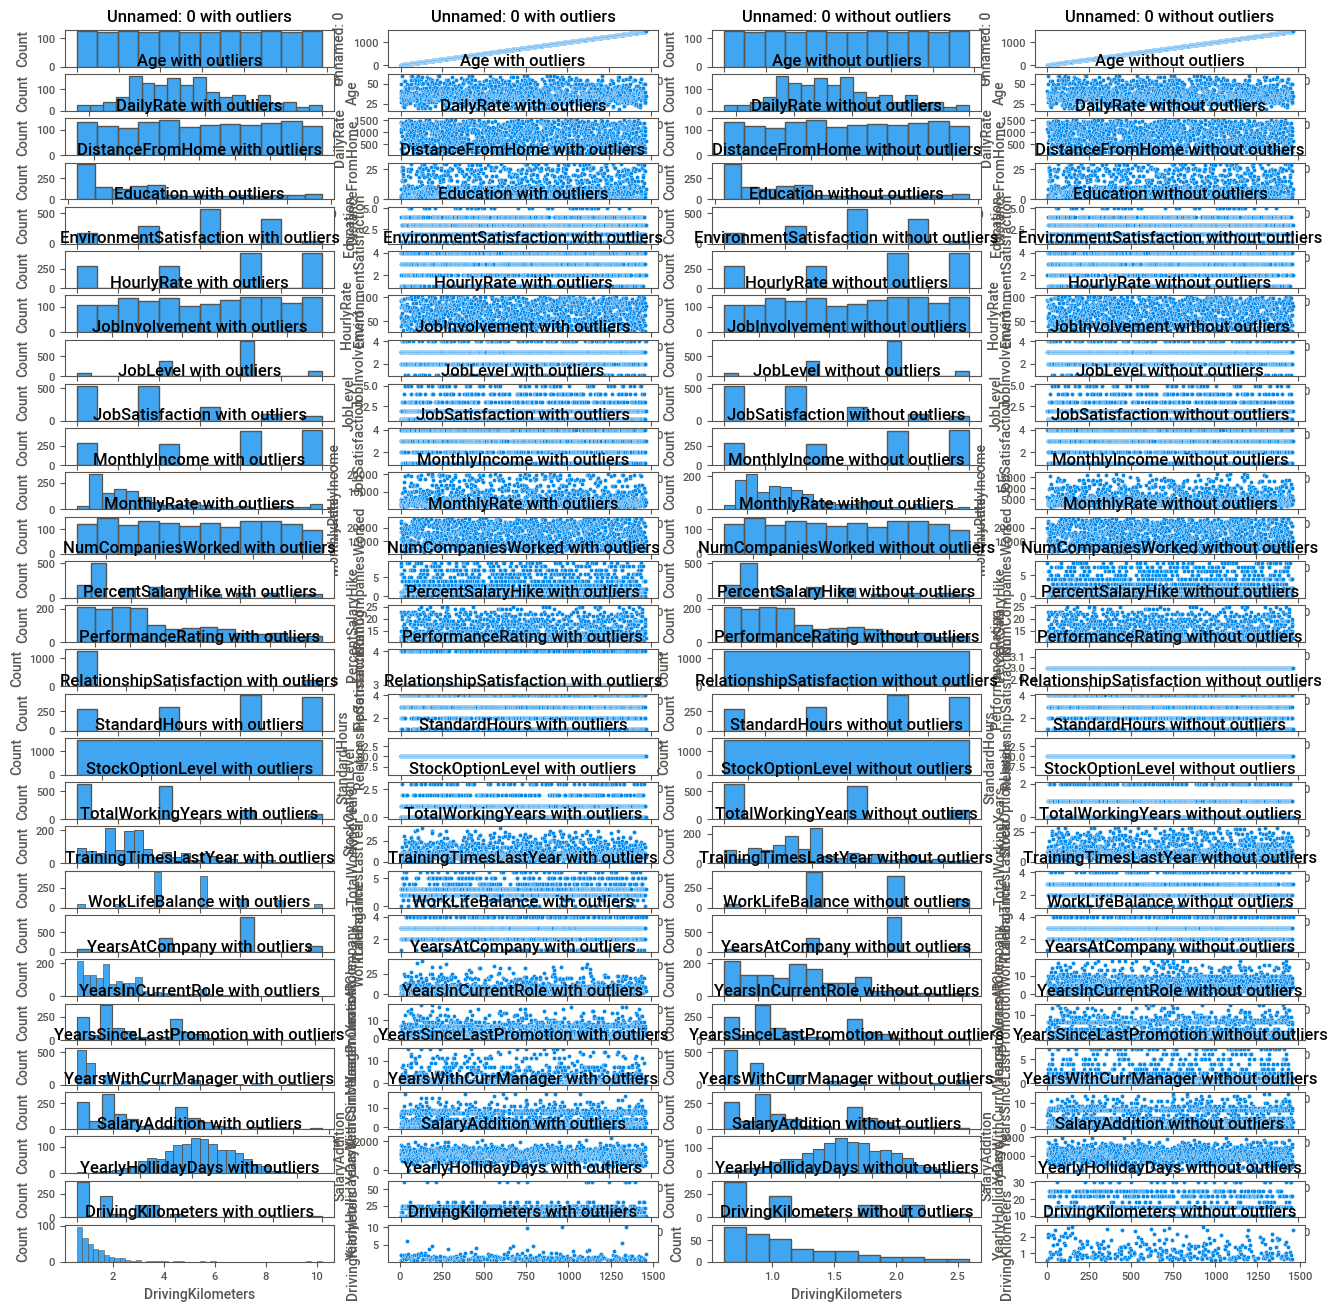

In [ ]:
vn = q1.columns

fig, ax = plt.subplots(28,4,figsize=(16,16))
n = 0
for i in range(0,df2.shape[1]):
    sns.histplot(ax=ax[n,0], x=df[vn[i]]).set(title="{} with outliers".format(vn[i]))
    sns.scatterplot(ax=ax[n,1], x=df.index, y=df[vn[i]]).set(title="{} with outliers".format(vn[i]))
    sns.histplot(ax=ax[n,2], x=q1[vn[i]]).set(title="{} without outliers".format(vn[i]))
    sns.scatterplot(ax=ax[n,3], x=q1.index, y=q1[vn[i]]).set(title="{} without outliers".format(vn[i]))
    n = n + 1

# Deciding which outliers can be removed and which cannot

The following code implements an algorhitm that check if the correlation changes (becomes statistically insignificant) and if the distributions changes significantly. The first is checked using Spearman correlation, while the second is checked using the <a href="https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test"> Kolmogorov Smirnov statistic </a>. This method is non-parametric and check the differences betweem two distributions.

In [ ]:
from scipy import stats
from scipy.stats import t, norm
from math import atanh, pow
from numpy import tanh

def independent_corr(xy, ab, n, n2 = None, twotailed=True, conf_level=0.95, method='fisher'):
    """
    Calculates the statistic significance between two independent correlation coefficients
    @param xy: correlation coefficient between x and y
    @param xz: correlation coefficient between a and b
    @param n: number of elements in xy
    @param n2: number of elements in ab (if distinct from n)
    @param twotailed: whether to calculate a one or two tailed test, only works for 'fisher' method
    @param conf_level: confidence level, only works for 'zou' method
    @param method: defines the method uses, 'fisher' or 'zou'
    @return: z and p-val
    """

    if method == 'fisher':
        xy_z = 0.5 * np.log((1 + xy)/(1 - xy))
        ab_z = 0.5 * np.log((1 + ab)/(1 - ab))
        if n2 is None:
            n2 = n

        se_diff_r = np.sqrt(1/(n - 3) + 1/(n2 - 3))
        diff = xy_z - ab_z
        z = abs(diff / se_diff_r)
        p = (1 - norm.cdf(z))
        if twotailed:
            p *= 2

        return z, p
    elif method == 'zou':
        L1 = rz_ci(xy, n, conf_level=conf_level)[0]
        U1 = rz_ci(xy, n, conf_level=conf_level)[1]
        L2 = rz_ci(ab, n2, conf_level=conf_level)[0]
        U2 = rz_ci(ab, n2, conf_level=conf_level)[1]
        lower = xy - ab - pow((pow((xy - L1), 2) + pow((U2 - ab), 2)), 0.5)
        upper = xy - ab + pow((pow((U1 - xy), 2) + pow((ab - L2), 2)), 0.5)
        return lower, upper
    else:
        raise Exception('Wrong method!')


def OutliersRemoveDecisions(df, y_label, threshold=1.5, significant_level=0.05):
    numeric_columns_names = df.select_dtypes("number").columns
    numeric_df = df[[name for name in numeric_columns_names]]

    with_outliers_df = numeric_df
    without_outliers_df = get_df_without_outliers(numeric_df, threshold)


    distribution_change_df = []

    for name in numeric_columns_names:
        with_outliers_series = with_outliers_df[name]
        without_outliers_series = without_outliers_df[name]

        ks_result = stats.ks_2samp(with_outliers_series, without_outliers_series)

        x_outliers = with_outliers_series
        x_no_outliers = without_outliers_series

        xy = x_outliers.corr(y_label, method='spearman')
        ab = x_no_outliers.corr(y_label, method='spearman')

        n = x_outliers.shape[0]
        n2 = x_no_outliers.shape[0]

        ftz_result = independent_corr(xy, ab, n, n2, method='fisher')
        totout = np.sum(with_outliers_series.count()) - np.sum(without_outliers_series.count())


        distribution_change_df.append(
            {
                'variable' : name,
                'outliers_number': '{} ({})'.format(totout, np.round(totout*100/n,2)),
                'distribution_change': '+' if ks_result[1] < significant_level else '-', #  ks_result[1] -> gives us the p-value
                'correlation_changed': '+' if ftz_result[1] < significant_level else '-', #  ftz_result[1] -> gives us the p-value
                'drop': 'no' if ((ks_result[1] < significant_level) & (ftz_result[1] < significant_level)) else 'yes'
            }
        )

    return pd.DataFrame(distribution_change_df)

Based on the algorithm, we can substitute outliers in all variables with NAs. As this was yet performed in the q1 dataset, we will continue with this dataset. We only have to add to it the categorical variables from df

In [ ]:
Attrition = df['Attrition']
Attrition

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
Attrition = Attrition.astype('float')
Attrition.dtypes

dtype('float64')

In [ ]:
OutliersRemoveDecisions(df_continous.iloc[:,0:28], Attrition)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


variable outliers_number distribution_change  \
0                 Unnamed: 0         0 (0.0)                   -   
1                        Age         0 (0.0)                   -   
2                  DailyRate         0 (0.0)                   -   
3           DistanceFromHome         0 (0.0)                   -   
4                  Education         0 (0.0)                   -   
5    EnvironmentSatisfaction         0 (0.0)                   -   
6                 HourlyRate         0 (0.0)                   -   
7             JobInvolvement         0 (0.0)                   -   
8                   JobLevel         0 (0.0)                   -   
9            JobSatisfaction         0 (0.0)                   -   
10             MonthlyIncome      114 (7.76)                   +   
11               MonthlyRate         0 (0.0)                   -   
12        NumCompaniesWorked       49 (3.33)                   -   
13         PercentSalaryHike         0 (0.0)                   -   
14         PerformanceRating     226 (15.37)                   +   
15  RelationshipSatisfaction         0 (0.0)                   -   
16             StandardHours         0 (0.0)                   -   
17          StockOptionLevel       85 (5.78)                   +   
18         TotalWorkingYears       63 (4.29)                   -   
19     TrainingTimesLastYear     187 (12.72)                   +   
20           WorkLifeBalance         0 (0.0)                   -   
21            YearsAtCompany      104 (7.07)                   +   
22        YearsInCurrentRole       21 (1.43)                   -   
23   YearsSinceLastPromotion      104 (7.07)                   +   
24      YearsWithCurrManager       14 (0.95)                   -   
25            SalaryAddition       14 (0.95)                   -   
26        YearlyHollidayDays       15 (1.02)                   -   
27         DrivingKilometers        22 (1.5)                   -   

   correlation_changed drop  
0                    -  yes  
1                    -  yes  
2                    -  yes  
3                    -  yes  
4                    -  yes  
5                    -  yes  
6                    -  yes  
7                    -  yes  
8                    -  yes  
9                    -  yes  
10                   -  yes  
11                   -  yes  
12                   -  yes  
13                   -  yes  
14                   -  yes  
15                   -  yes  
16                   -  yes  
17                   -  yes  
18                   -  yes  
19                   -  yes  
20                   -  yes  
21                   -  yes  
22                   -  yes  
23                   -  yes  
24                   -  yes  
25                   -  yes  
26                   -  yes  
27                   -  yes

In [ ]:
print(test_df.columns)


Index(['Unnamed: 0', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'SalaryAddition', 'YearlyHollidayDays',
       'DrivingKilometers'],
      dtype='object')


In [ ]:
for categorial_column in categorical_columns:
    q1[categorial_column] = test_df[categorial_column]


KeyError: 'Department '

In [ ]:


# Assuming df is your original DataFrame
# Example initialization of q1, can be an existing DataFrame or a new one
#q1 = pd.DataFrame()

# Get a list of all categorical columns in df
#categorical_columns = df.select_dtypes(include=['category', 'object']).columns

# Loop through each categorical column and copy it to q1
#for column in categorical_columns:
    #q1[column] = df[column]

# Now q1 contains all categorical columns from df


In [ ]:
q1

Unnamed: 0   Age  DailyRate  DistanceFromHome  Education  \
0              0  41.0     1102.0               1.0          2   
1              1  49.0      279.0               8.0          1   
2              2  37.0     1373.0               2.0          2   
3              3  33.0     1392.0               3.0          4   
4              4  27.0      591.0               2.0          1   
...          ...   ...        ...               ...        ...   
1465        1465  36.0      884.0              23.0          2   
1466        1466  39.0      613.0               6.0          1   
1467        1467  27.0      155.0               4.0          3   
1468        1468  49.0     1023.0               2.0          3   
1469        1469  34.0      628.0               8.0          3   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                         2.0        94.0             3.0       2.0   
1                         3.0        61.0             2.0       2.0   
2                         4.0        92.0             2.0       1.0   
3                         4.0        56.0             3.0       1.0   
4                         1.0        40.0             3.0       1.0   
...                       ...         ...             ...       ...   
1465                      3.0        41.0             4.0       2.0   
1466                      4.0        42.0             2.0       3.0   
1467                      2.0        87.0             4.0       2.0   
1468                      4.0        63.0             2.0       2.0   
1469                      2.0        82.0             4.0       2.0   

      JobSatisfaction  ...  YearlyHollidayDays  DrivingKilometers  Attrition  \
0                 4.0  ...                10.0                NaN        Yes   
1                 2.0  ...                 NaN                NaN         No   
2                 3.0  ...                 NaN                NaN        Yes   
3                 3.0  ...                10.0           0.640162         No   
4                 2.0  ...                10.0           2.122465         No   
...               ...  ...                 ...                ...        ...   
1465              4.0  ...                 NaN                NaN         No   
1466              1.0  ...                 NaN                NaN         No   
1467              2.0  ...                10.0                NaN         No   
1468              2.0  ...                 NaN                NaN         No   
1469              3.0  ...                10.0                NaN         No   

         BusinessTravel  EducationField  Gender                    JobRole  \
0         Travel_Rarely   Life Sciences  Female            Sales Executive   
1     Travel_Frequently   Life Sciences    Male         Research Scientist   
2         Travel_Rarely           Other    Male      Laboratory Technician   
3     Travel_Frequently   Life Sciences  Female         Research Scientist   
4         Travel_Rarely         Medical    Male      Laboratory Technician   
...                 ...             ...     ...                        ...   
1465  Travel_Frequently         Medical    Male      Laboratory Technician   
1466      Travel_Rarely         Medical    Male  Healthcare Representative   
1467      Travel_Rarely   Life Sciences    Male     Manufacturing Director   
1468  Travel_Frequently         Medical    Male            Sales Executive   
1469      Travel_Rarely         Medical    Male      Laboratory Technician   

      MaritalStatus  Over18  OverTime  
0            Single       Y       Yes  
1           Married       Y        No  
2            Single       Y       Yes  
3           Married       Y       Yes  
4           Married       Y        No  
...             ...     ...       ...  
1465        Married       Y        No  
1466        Married       Y        No  
1467        Married       Y       Yes  
1468        Married       Y        No  
1469        Married   

Calculate the number and percentage of missing values

In [ ]:
pd.DataFrame([q1.isna().sum(),q1.isna().sum()/q1.shape[0]*100]).transpose()

0          1
Unnamed: 0                   0.0   0.000000
Age                          0.0   0.000000
DailyRate                    0.0   0.000000
DistanceFromHome             0.0   0.000000
Education                    0.0   0.000000
EnvironmentSatisfaction      0.0   0.000000
HourlyRate                   0.0   0.000000
JobInvolvement               0.0   0.000000
JobLevel                     0.0   0.000000
JobSatisfaction              0.0   0.000000
MonthlyIncome              114.0   7.755102
MonthlyRate                  0.0   0.000000
NumCompaniesWorked          94.0   6.394558
PercentSalaryHike            0.0   0.000000
PerformanceRating          226.0  15.374150
RelationshipSatisfaction     0.0   0.000000
StandardHours                0.0   0.000000
StockOptionLevel            85.0   5.782313
TotalWorkingYears           63.0   4.285714
TrainingTimesLastYear      479.0  32.585034
WorkLifeBalance              0.0   0.000000
YearsAtCompany             104.0   7.074830
YearsInCurrentRole          21.0   1.428571
YearsSinceLastPromotion    192.0  13.061224
YearsWithCurrManager        14.0   0.952381
SalaryAddition             187.0  12.721088
YearlyHollidayDays         543.0  36.938776
DrivingKilometers         1139.0  77.482993
Attrition                    0.0   0.000000
BusinessTravel               0.0   0.000000
EducationField               0.0   0.000000
Gender                       0.0   0.000000
JobRole                      0.0   0.000000
MaritalStatus                0.0   0.000000
Over18                       0.0   0.000000
OverTime                     0.0   0.000000

In [ ]:
!pip install missingno

NameError: name 'missrows' is not defined

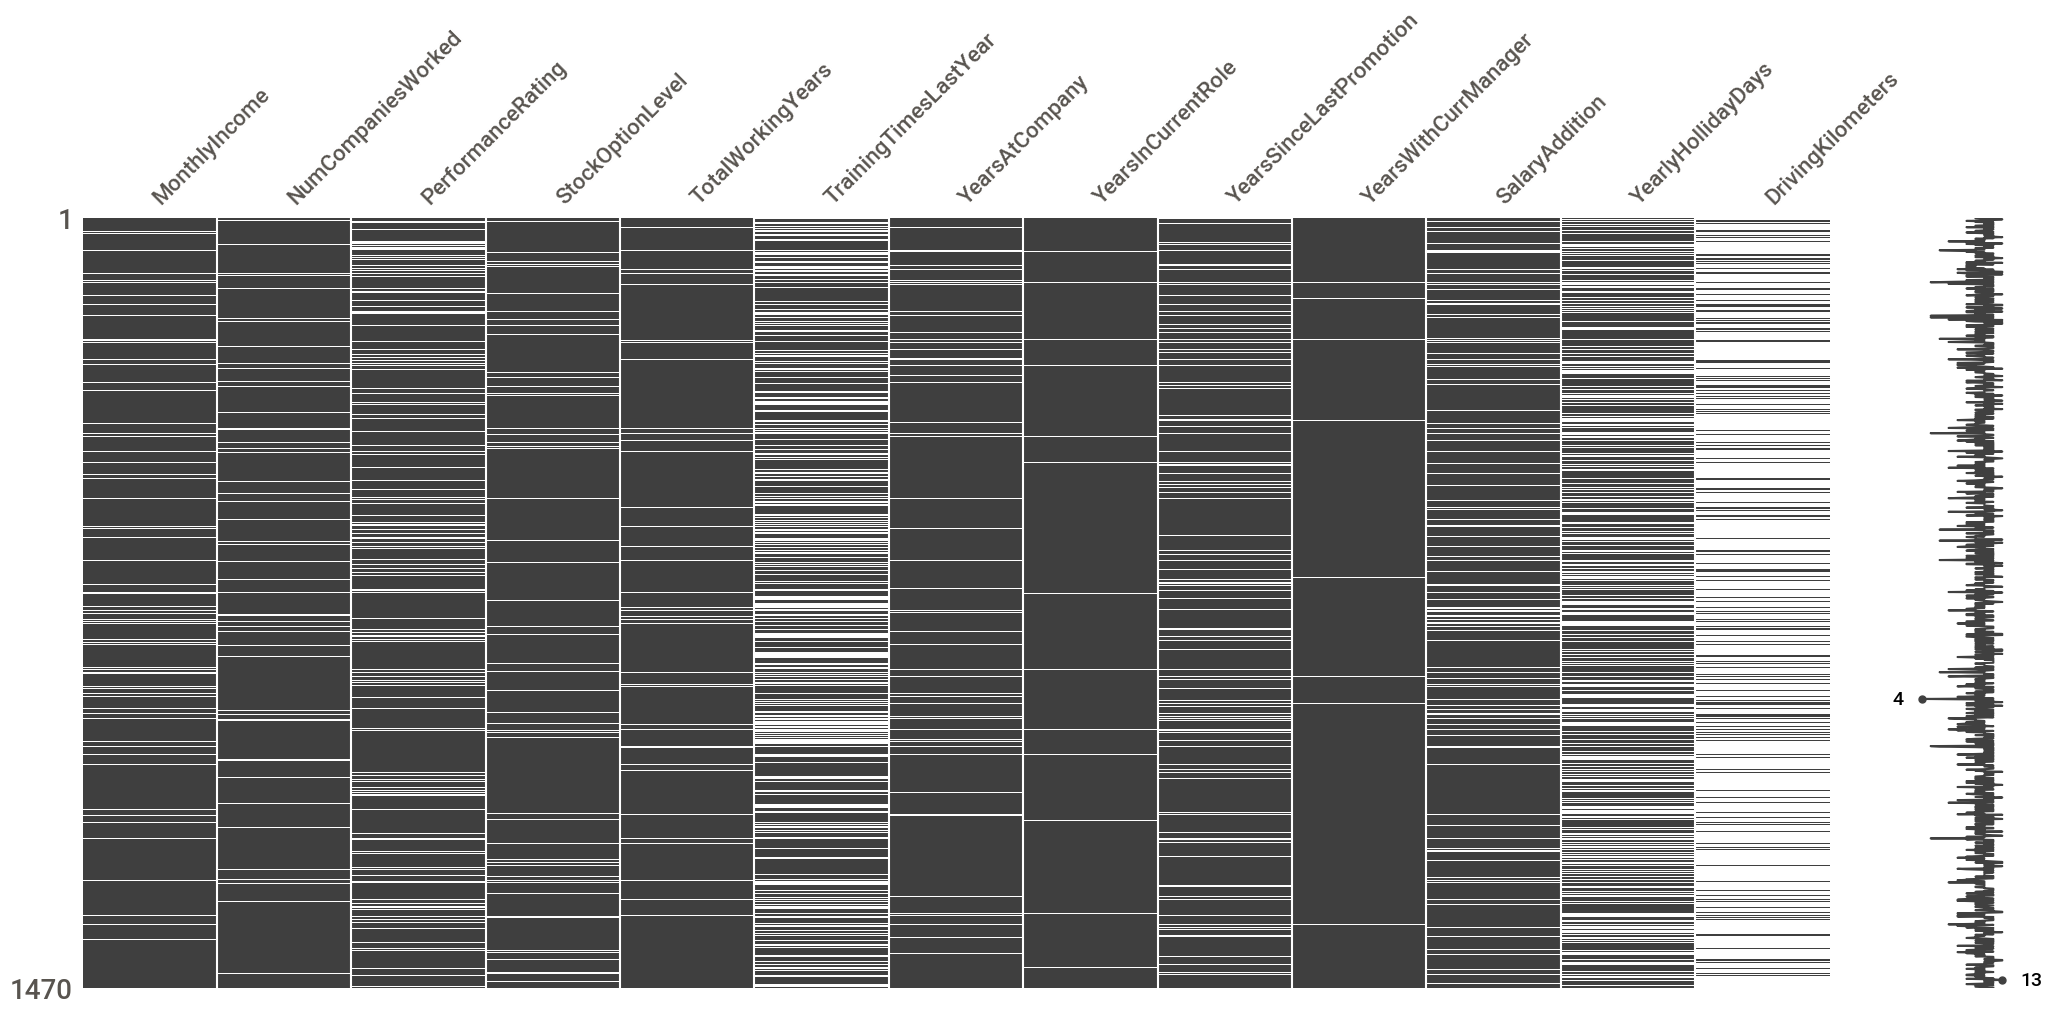

In [ ]:

import missingno as msno

missingdata_df = q1.columns[q1.isnull().any()].tolist()
msno.matrix(q1[missingdata_df])

missrows[missrows[1] >= 50]